In [1]:
# handling data
import numpy as np
import pandas as pd

import shap

# plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import statsmodels.api as sm
from pygam import LinearGAM, PoissonGAM, s, l, f
from matplotlib import lines

# handling telomere length data
import fukushima_telomere_methods as f_tm

# for loading telo data column containing individual
# telomere length values, enables literal reading of a list as numbers
from ast import literal_eval

# setting all graphs to have darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

# incase module requires reloading
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [5]:
# report internal alongside total lifetime

---
&nbsp; 

...

&nbsp; 

---

# Mean Telomere Length & Dose

In [6]:
# Loading New Dose Quantifications (+age/sex data), Cortisol, Telomere FISH, and Dicentric Data

In [7]:
kelly_boar_dose = pd.read_csv('../excel data/cleaned/kelly_boar_dose.csv')
kelly_boar_teloFISH_df = pd.read_csv('../excel data/cleaned/kelly_boar_teloFISH_df.csv')
kelly_boar_teloFISH_df['teloFISH data'] = kelly_boar_teloFISH_df['teloFISH data'].apply(lambda row: np.array(literal_eval(row)))

In [8]:
# kelly_boar_dose

In [9]:
# kelly_boar_teloFISH_df

## Merging Kelly's Telomere FISH data w/ New Dose Quantifications (+age/sex data)

In [10]:
# general cols of interest
general_cols_of_interest = ['Sample ID', 'Sex', 'Age (months)', 
                            'INTERNAL Life time dose, mGy 134+137',
#                             'EXTERNAL Dose Reasonable Life Time, mGy (134+137)',
                            'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
                            'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)',
                            'teloFISH data',
                           ]

In [11]:
merge_kelly_teloFISH_dose = kelly_boar_teloFISH_df.merge(kelly_boar_dose, on=['Sample ID'])
teloFISH_cols = general_cols_of_interest + ['teloFISH means']

# selecting cols of interest 
merge_kelly_teloFISH_dose = merge_kelly_teloFISH_dose[teloFISH_cols].copy()

In [12]:
# merge_kelly_teloFISH_dose.head(3)

In [13]:
for loc in [3, 4, 5]:
    merge_kelly_teloFISH_dose.iloc[10, loc] = 0
    merge_kelly_teloFISH_dose.iloc[11, loc] = 0

In [14]:
merge_kelly_teloFISH_dose2 = pd.read_excel('../excel data/cleaned/merge_kelly_teloFISH_dose-06Nov20.xlsx')

In [15]:
merge_kelly_teloFISH_dose.rename(columns={'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)': 
                                          'Dose rate (uGy per h)',
                                          'teloFISH means': 'Mean Telomere Length (FISH)'}, inplace=True)

merge_kelly_teloFISH_dose['encoded sex'] = merge_kelly_teloFISH_dose['Sex'].apply(lambda row: f_tm.encode_sex(row))
# f_tm.enforce_col_types(merge_kelly_teloFISH_dose)

In [16]:
# saving for final writeup
merge_kelly_teloFISH_dose.to_csv('../excel data/cleaned/merge_kelly_teloFISH_dose.csv', index=False)

## Visualizing Mean Telomere Length vs. Dose

In [28]:
dose_types = ['INTERNAL Life time dose, mGy 134+137',
              'EXTERNAL Dose Reasonable Life Time, mGy (134+137)',
              'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
              'Dose rate (uGy per h)']

Performing a multivariate linear regression between dose/age vs. telomere length, then storing the fitted models predictions of telomere length as 'y_pred'.. seeing how 'y_pred' looks plotted below

In [29]:
merge_kelly_teloFISH_dose['Age class'] = 'temp'
merge_kelly_teloFISH_dose['Age class'] = merge_kelly_teloFISH_dose['Age (months)'].apply(lambda row: f_tm.make_age_class(row))

In [30]:
merge_kelly_teloFISH_dose.head(3)

,Sample ID,Sex,Age (months),"INTERNAL Life time dose, mGy 134+137","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy per h),teloFISH data,Mean Telomere Length (FISH),encoded sex,Age class
0,1606103,Male,6,2.756694,34.911894,3.554446,"[0.4915182841543535, 0.48034741405993636, 0.21...",0.439557,0,piglet
1,1607205,Male,1,0.034633,0.916633,0.727816,"[0.2960280575020538, 0.6758376407122361, 0.508...",0.452469,0,piglet
2,1607221,Male,1,2.459387,20.099387,4.946150,"[0.9160113477422043, 0.754033731373156, 0.2569...",0.533217,0,piglet


In [31]:
merge_kelly_teloFISH_dose.corr()

,Age (months),"INTERNAL Life time dose, mGy 134+137","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy per h),Mean Telomere Length (FISH),encoded sex
Age (months),1.000000,0.769164,0.625354,-0.023766,-0.095924,0.286461
"INTERNAL Life time dose, mGy 134+137",0.769164,1.000000,0.716299,0.201567,-0.137907,0.427309
"Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",0.625354,0.716299,1.000000,0.562241,-0.132941,0.466219
Dose rate (uGy per h),-0.023766,0.201567,0.562241,1.000000,-0.042063,0.333824
Mean Telomere Length (FISH),-0.095924,-0.137907,-0.132941,-0.042063,1.000000,0.073808
encoded sex,0.286461,0.427309,0.466219,0.333824,0.073808,1.000000


In [32]:
age = merge_kelly_teloFISH_dose[['Sample ID', 'Age (months)']].copy()
age['Sample ID'] = age['Sample ID'].astype('str')
merge_kelly_teloFISH_dose2['Sample ID'] = merge_kelly_teloFISH_dose2['Sample ID'].astype('str')

In [33]:
print(merge_kelly_teloFISH_dose.shape)
merge_kelly_teloFISH_dose2 = merge_kelly_teloFISH_dose2.merge(age, on='Sample ID', how='left')
print(merge_kelly_teloFISH_dose.shape)

(37, 10)
(37, 10)


In [34]:
merge_kelly_teloFISH_dose2.rename({'Mean Telomere Length (FISH)':'Mean Telomere Length (Telo-FISH)'}, axis=1, inplace=True)

In [35]:
merge_kelly_teloFISH_dose2.to_csv('merge_kelly_TeloFISH for gam.csv')

In [36]:
table1 = merge_kelly_teloFISH_dose2[[
    'Sample ID',	
    'Sex',
    'Age (months)',
    'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',	
    'Dose rate (uGy per h)',	
    'Mean Telomere Length (Telo-FISH)'
]].copy()

KeyError: "['Age (months)'] not in index"

In [37]:
table1.describe(include='all').to_csv('mean telomere length table.csv')
table1.describe(include='all')

,Sample ID,Sex,Age (months),"Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy per h),Mean Telomere Length (Telo-FISH)
count,37,37,37.000000,37.000000,37.000000,37.000000
unique,37,2,NaN,NaN,NaN,NaN
top,161206O230,Male,NaN,NaN,NaN,NaN
freq,1,20,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.486486,130.744865,4.395676,0.709943
std,NaN,NaN,10.120446,169.019226,3.794611,0.252169
min,NaN,NaN,1.000000,0.920000,0.100000,0.285463
25%,NaN,NaN,6.000000,29.220000,2.240000,0.537292
50%,NaN,NaN,9.000000,42.080000,3.640000,0.679246
75%,NaN,NaN,19.000000,179.040000,4.950000,0.837827


In [42]:
merge_kelly_teloFISH_dose2.head(3)

,QA/QC dose,Sample ID,Sex,"Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy per h),Mean Telomere Length (Telo-FISH),encoded sex,Age (months)_x,Age (months)_y
0,ok,1606101,Male,42.08,7.35,0.401069,0,8,8
1,ok,1606102,Female,15.06,3.64,1.174770,1,6,6
2,ok,1606103,Male,34.91,3.55,0.439557,0,6,6


In [43]:
merge_kelly_teloFISH_dose2.drop('Age (months)_y', axis=1,inplace=True)
merge_kelly_teloFISH_dose2.rename({'Age (months)_x':'Age (months)'}, axis=1, inplace=True)

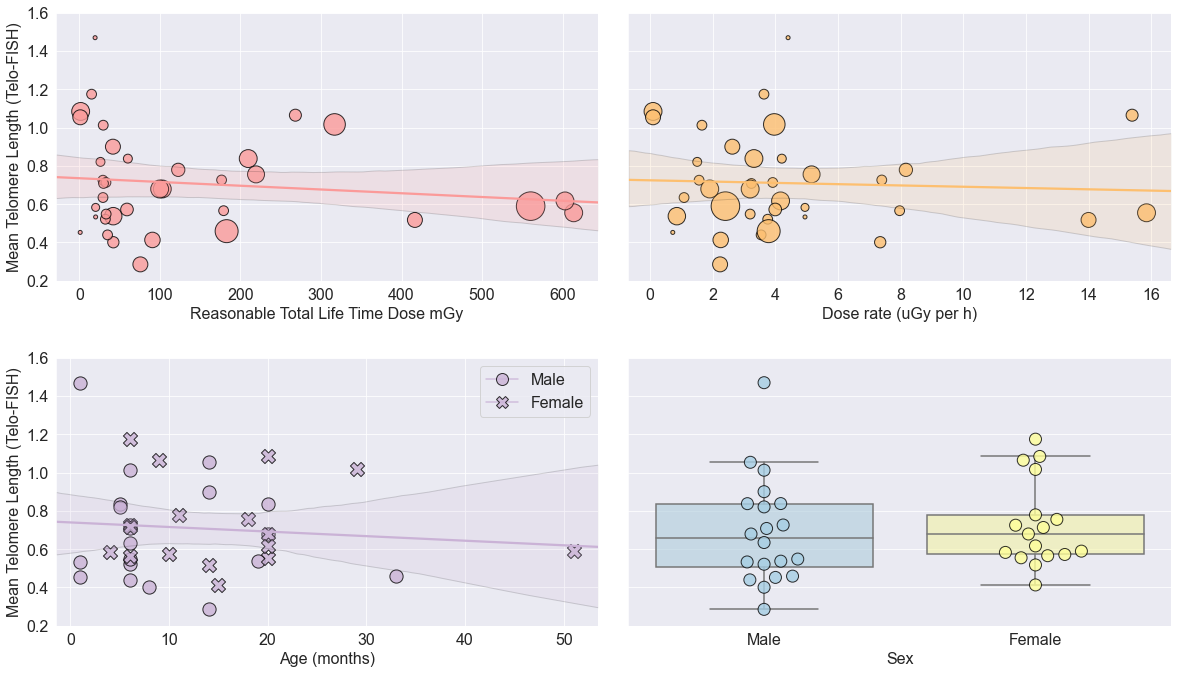

In [51]:
dose_type = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
             'Dose rate (uGy per h)',]

x2 = 'Age (months)'
x3 = 'Sex'
y = 'Mean Telomere Length (Telo-FISH)'

graph_y_vs_dose_age_sex2(df=merge_kelly_teloFISH_dose2.rename({'Mean Telomere Length (FISH)':
                                                                  'Mean Telomere Length (Telo-FISH)'},
                                                                 axis=1),
                                                                 x=dose_type[0], x2=x2, x3=x3, y=y,
                                                                 x_name='Reasonable Total Life Time Dose mGy',
                                                                 x_rate=dose_type[1],
                                                                 x_rate_name='Dose rate (uGy per h)'
                                                                )

## OLS linear regression

In [48]:
merge_kelly_teloFISH_dose2['encoded sex'] = merge_kelly_teloFISH_dose2['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [49]:
merge_kelly_teloFISH_dose2.drop(['QA/QC dose'], axis=1, inplace=True)

In [50]:
y = merge_kelly_teloFISH_dose2['Mean Telomere Length (FISH)'].values.reshape(-1, 1)
y_name = 'teloFISH means'

dose_type = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
             'Dose rate (uGy per h)',]

reg = f_tm.linear_regression_scores_X_y(merge_kelly_teloFISH_dose2, y, y_name, dose_type)

KeyError: 'Mean Telomere Length (FISH)'

In [ ]:
df = merge_kelly_teloFISH_dose2.copy()
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose (mGy)',
           'Mean Telomere Length (FISH)':
           'Mean Telomere Length (Telo-FISH)'}, axis=1, inplace=True)

df['constant'] = 1
endog = df['Mean Telomere Length (Telo-FISH)']
exog = df[['Reasonable Total Life Time Dose (mGy)', 'Dose rate (uGy per h)', 'Age (months)', 'encoded sex', 'constant']]

model = sm.OLS(endog, exog=exog, missing='none', hasconst=True)
results = model.fit()

# results.summary()

In [99]:
merge_kelly_teloFISH_dose.head(3)

,Sample ID,Sex,Age (months),"INTERNAL Life time dose, mGy 134+137","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137),teloFISH means,encoded sex
0,1606103,Male,6,2.756694,34.911894,3.554446,0.439557,0
1,1607205,Male,1,0.034633,0.916633,0.727816,0.452469,0
2,1607221,Male,1,2.459387,20.099387,4.946150,0.533217,0


## OLS multivariate linear regression results table

In [100]:
LRresult = (results.summary2().tables[1])
LRresult = LRresult.round(4).reset_index().rename({'index':'Independent variables',
                                                   't':'t statistic'}, axis=1)
# LRresult.iloc[0, 0] = 'Reasonable Life Time Dose'
# LRresult.iloc[2, 0] = 'Sex'
# LRresult.iloc[3, 0] = 'Constant'
LRresult

,Independent variables,Coef.,Std.Err.,t statistic,P>|t|,[0.025,0.975]
0,Reasonable Total Life Time Dose (mGy),-0.0003,0.0005,-0.5713,0.5718,-0.0013,0.0007
1,Dose rate (uGy per h),-0.0006,0.0174,-0.0323,0.9745,-0.0359,0.0348
2,Age (months),-0.0007,0.0069,-0.0947,0.9252,-0.0147,0.0134
3,encoded sex,0.0864,0.0990,0.8729,0.3892,-0.1152,0.2880
4,constant,0.7181,0.1055,6.8082,0.0000,0.5033,0.9330


In [101]:
LRresult.to_csv('teloFISH_linear_reg.csv')

In [20]:
# f_tm.render_mpl_table(LRresult.round(4), col_width=3.65, font_size=18,
#                       path='graphs/main figures/OLS telofish LABEL.png')

In [21]:
cols = pd.DataFrame({f'Dependent variable: {endog.name}':[''],
                     f'R2 score: {results.rsquared.round(4)}':['']})
f_tm.render_mpl_table(cols, col_width=7, font_size=18,
                      path='graphs/main figures/OLS teloFISH LABEL.png')

In [22]:
import six

In [23]:
def render_mpl_table(data, col_width=3.0, row_height=0.525, font_size=16, figsize=(30,20),
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='black',
                     bbox=[0, 0, 1, 1], header_columns=0, path=None,
                     ax=None, **kwargs):
    if ax is None:
#         size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(
            figsize=figsize,
        )
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, colLoc='center', **kwargs,
#                          colWidths=[.6, .4, .25, .4, .4, .4, .4, .4],
                        )
    mpl_table.auto_set_column_width(col=list(range(len(df.columns)))) # Provide integer list of columns to adjust


    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    if path != None:
        plt.savefig(path, dpi=600, bbox_inches='tight')
    
#     plt.close()

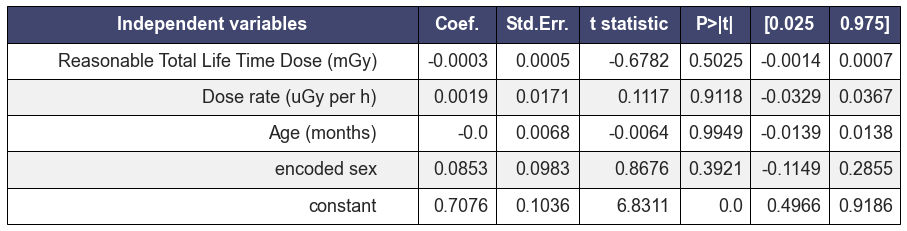

In [24]:
render_mpl_table(LRresult, font_size=18, figsize=(16, 4),
                 path='graphs/main figures/OLS teloFISH.png')

## Generalized additive model 

In [25]:
df = merge_kelly_teloFISH_dose.copy()
# df['constant'] = 1
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose mGy',
           'Mean Telomere Length (FISH)':
           'Mean Telomere Length (Telo-FISH)'}, axis=1, inplace=True)
df.to_csv('gam_telofish.csv')

In [26]:
df = merge_kelly_teloFISH_dose.copy()
# df['constant'] = 1
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose mGy',
           'Mean Telomere Length (FISH)':
           'Mean Telomere Length (Telo-FISH)'}, axis=1, inplace=True)

y = df['Mean Telomere Length (Telo-FISH)'].copy()
X = df[['Reasonable Total Life Time Dose mGy', 'Dose rate (uGy per h)', 'Age (months)', 'encoded sex',]].copy()

lam = np.logspace(5, 5, 5, 5)
lams = [lam] * 4
# n_splines=25
lam=10

gam = LinearGAM(s(0) + s(1) + s(2) + s(3), fit_intercept=True).fit(X, y)

gam.gridsearch(X, y, lam=lams,
               keep_best=True, 
              )

100% (625 of 625) |######################| Elapsed Time: 0:00:27 Time:  0:00:27


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [27]:
explainer = shap.KernelExplainer(gam.predict, X)
shap_values = explainer.shap_values(X)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


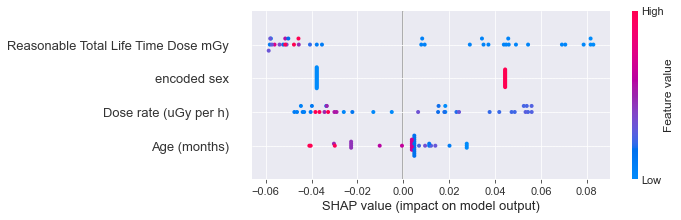

In [28]:
# fig, ax = plt.subplots(figsize=(4,4))
shap.summary_plot(shap_values, features=X, feature_names=X.columns, show=False)
plt.savefig('SHAP teloFISH summary.png', bbox_inches='tight', dpi=600)

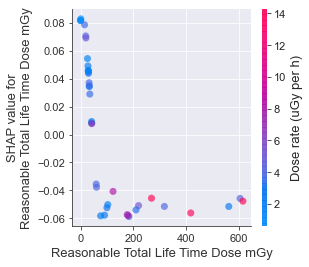

In [29]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(0, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
plt.savefig('SHAP teloFISH total dose main.png', dpi=600, bbox_inches='tight')

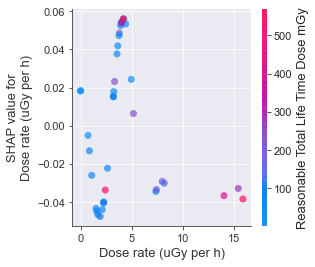

In [30]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(1, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP teloFISH dose rate main.png', dpi=600, bbox_inches='tight')

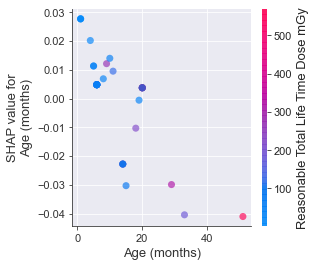

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(2, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP teloFISH age main.png', dpi=600, bbox_inches='tight')

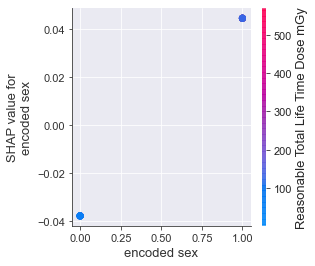

In [32]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(3, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP teloFISH sex main.png', dpi=600, bbox_inches='tight')

In [33]:
gam.predict(X)

array([0.73978768, 0.77385623, 0.7895002 , 0.77590979, 0.64122983,
       0.62258428, 0.66289106, 0.69576681, 0.62438284, 0.65654794,
       0.85426186, 0.74557156, 0.69292461, 0.63499   , 0.69783462,
       0.722595  , 0.63501721, 0.7645057 , 0.69079839, 0.87583794,
       0.7833934 , 0.58240055, 0.72298215, 0.81998902, 0.61779086,
       0.68923923, 0.75749157, 0.66813305, 0.54688938, 0.6682002 ,
       0.64863056, 0.63263589, 0.67160862, 0.684206  , 0.75662992,
       0.84287256, 0.7348817 ])

In [34]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      5.5187
Link Function:                     IdentityLink Log Likelihood:                                  -189.4247
Number of Samples:                           37 AIC:                                              391.8869
                                                AICc:                                             395.2119
                                                GCV:                                                0.0826
                                                Scale:                                              0.0608
                                                Pseudo R-Squared:                                   0.1644
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



In [35]:
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

In [36]:
rep = [col.replace(' ', '_') for col in df.columns]
rep = [col.replace('(', '') for col in rep]
rep = [col.replace(')', '') for col in rep]
rep = [col.replace('-', '') for col in rep]


df.columns = rep

In [37]:
# import statsmodels.api as sm

# from statsmodels.gam.api import GLMGam, BSplines

# # import data

# # create spline basis for weight and hp
# x_spline = df[['Reasonable_Total_Life_Time_Dose_mGy', 'Dose_rate_uGy_per_h', 
# #                'Age_months', 'encoded_sex',
#               ]]

# endo = df[['Mean_Telomere_Length_TeloFISH']].copy()
# exo = df[['Reasonable_Total_Life_Time_Dose_mGy', 'Dose_rate_uGy_per_h', 
#           'Age_months', 'encoded_sex'
#          ]].copy()

# bs = BSplines(x_spline, df=[4, 4, 
# #                             4, 4
#                            ], degree=[3, 3, 
# #                                       3, 3
#                                      ])

# # penalization weight
# alpha = np.array([30, 5, 
# #                   9999, 9999
#                  ])

# # gam_bs = GLMGam.from_formula('Mean_Telomere_Length_TeloFISH ~ Reasonable_Total_Life_Time_Dose_mGy + Dose_rate_uGy_per_h + Age_months + encoded_sex', 
# #                                      data=df, smoother=bs, alpha=alpha)

# gam_bs = GLMGam(endo, exo, data=df, smoother=bs, alpha=alpha)

# res_bs = gam_bs.fit()

# print(res_bs.summary())

In [38]:
# endo

In [39]:
# gam_bs.predict(
#     [0.0005, 0.001, 0.001, 0.001], 
#                exo)

In [40]:
# gam.predict(X)

KeyError: 'Sample ID'

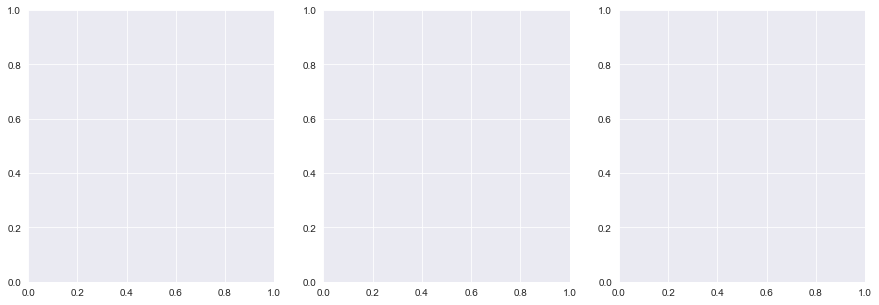

In [41]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=False, sharex=False)
fontsize=16

colors = sns.color_palette('Set1', len(df['Sample ID'].unique())), 
t = (1,)
test = [x + t for x in colors[0]]

titles = ['Reasonable Total Life Time Dose (mGy)', 'Age (months)', 'Sex']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color=test[i], linewidth=2)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='black', alpha=.8, ls='--')
    ax.set_xlabel(titles[i], fontsize=fontsize)
    ax.tick_params(labelsize=14)
axs[0].set_ylabel('Mean Telomere Length (Telo-FISH)', fontsize=fontsize)

plt.tight_layout()
# plt.savefig(f'graphs/main figures/GAM Mean Telomere Length (Telo-FISH) vs {titles}.png', dpi=600, bbox_inches='tight')

In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(gam.predict, X)
shap_values = explainer.shap_values(X)

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)
plt.savefig('')

In [ ]:
plt.figure(figsize=(12,6))
shap.dependence_plot(0, shap_values, X, feature_names=X.columns)

In [ ]:
plt.figure(figsize=(12,6))
shap.dependence_plot(1, shap_values, X, feature_names=X.columns)

In [ ]:
plt.figure(figsize=(12,6))
shap.dependence_plot(2, shap_values, X, feature_names=X.columns)

In [ ]:
plt.figure(figsize=(12,6))
shap.dependence_plot(3, shap_values, X, feature_names=X.columns)

In [ ]:
plt.figure(figsize=(12,6))
shap.dependence_plot(4, shap_values, X, feature_names=X.columns)

In [ ]:
X.columns

In [ ]:
# fig, axes = plt.subplots()
fig, ax = plt.subplots(figsize=(9,6))
shap.dependence_plot(0, shap_values, X, ax=ax, dot_size=60, alpha=.75)
# plt.savefig('asdasdasda.png', dpi=600)
fig.savefig('full_figure.png', dpi=600)

In [ ]:
shap.dependence_plot?

In [ ]:
gam.summary()

In [ ]:
merge_kelly_teloFISH_dose.head(3)

# Cortisol and Dose

In [3]:
# check look @ sourcing of boar 

In [ ]:
# 1607261, 1607264, 1611301O210, 161216O247, 180625N1

In [4]:
# total_dose_cortisol

In [52]:
cortisol_92920 = pd.read_excel('total_dose_cortisol-th-17Sept20 (1).xlsx')
cortisol_92920.dropna(axis=0, subset=['Coded Zones: Control Area = 1; within Exclusion Zone =2'], inplace=True)
# cortisol_92920.drop('Unnamed: 0', axis=1, inplace=True)
# cortisol_92920.rename({'Coded for city where captured, Okuma = 0, 
# Namie =1, Futaba = 2, Katsurao = 3, Tochigi = 4, Nihonmatsu = 5, Nagasaki = 6, Fukushima = 7':'location coded'}, axis=1, inplace=True)
# cortisol_92920['location coded'] = cortisol_92920['location coded'].astype('str')
cortisol_92920 = cortisol_92920.iloc[0:41].copy()

cols = [
    'Coded for Season; 1 = Summer, 0 = Winter',
    'Coded Zones: Control Area = 1; within Exclusion Zone =2',
]

for col in cols:
    cortisol_92920[col] = cortisol_92920[col].astype('category')
cortisol_92920.head(3)

,Unnamed: 0,Sample ID,Location,"Coded for city where captured, Okuma = 0, Namie =1, Futaba = 2, Katsurao = 3, Tochigi = 4, Nihonmatsu = 5, Nagasaki = 6, Fukushima = 7",Coded Zones: Control Area = 1; within Exclusion Zone =2,Date of Capture,"Coded for Season; 1 = Summer, 0 = Winter",Longitude,Latitude,Sex / mass (kg),encoded sex; M=0 F=1,Age (months),"INTERNAL Life time dose, mGy 134+137","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate at capture (uGy per h),Cortisol (pg/mg),AVG Cort of QA/QC controls,Unnamed: 17
0,NaN,1607261,Okuma,0.0,2.0,2016-07-26,1.0,37.416,141.012,Female,1.0,20,29.2001,613.840071,15.849122,6.73684,NaN,NaN
1,NaN,1607262,Okuma,0.0,2.0,2016-07-26,1.0,37.393,140.995,Male,0.0,20,4.99736,209.621361,3.316593,7.08758,NaN,NaN
2,NaN,1607264,Okuma,0.0,2.0,2016-07-26,1.0,37.4,140.989,Female,1.0,18,31.1378,219.297820,5.162829,5.36,NaN,NaN


In [70]:
# sns.set(font_scale=1.5)
# plt.figure(figsize=(14,8))
# sns.scatterplot(x='Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', y='Cortisol (pg/mg)', s=400, 
#                 alpha=.8, data=cortisol_92920, hue='Coded Zones: Control Area = 1; within Exclusion Zone =2')

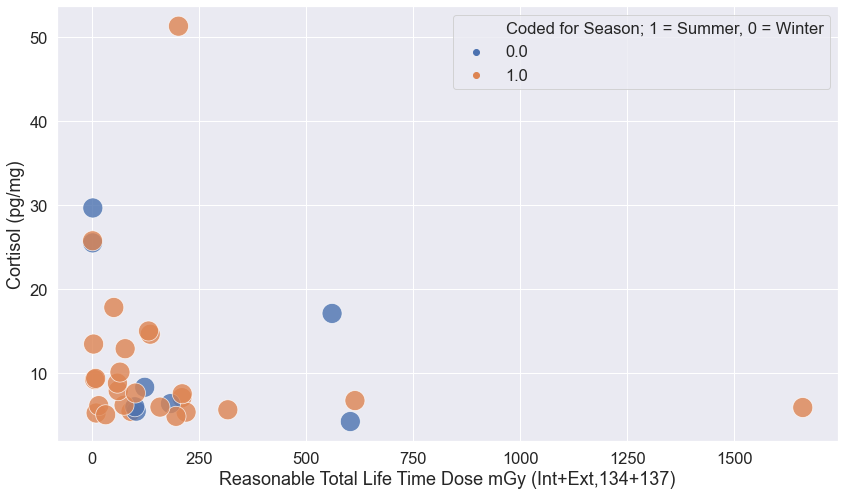

In [53]:
# put ~50 pgmg cortisol boar back in

sns.set(font_scale=1.5)
plt.figure(figsize=(14,8))
sns.scatterplot(x='Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', y='Cortisol (pg/mg)', s=400, 
                alpha=.8, data=cortisol_92920, hue='Coded for Season; 1 = Summer, 0 = Winter')

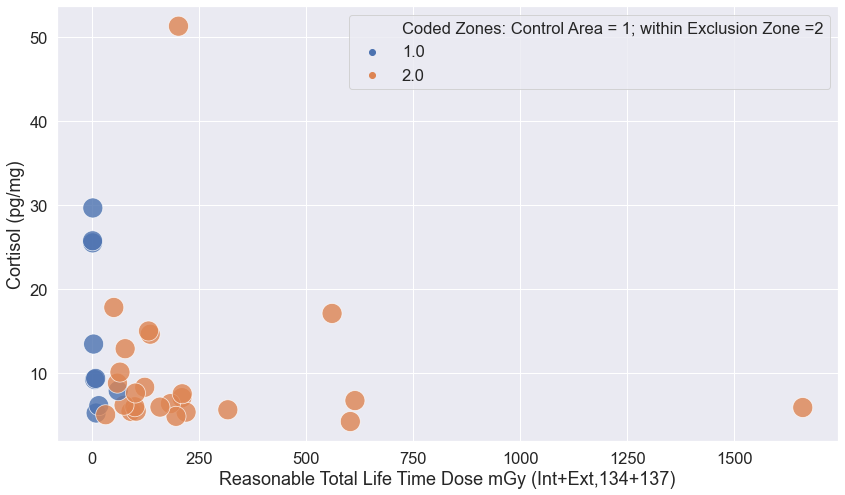

In [51]:
sns.set(font_scale=1.5)
plt.figure(figsize=(14,8))
sns.scatterplot(x='Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', y='Cortisol (pg/mg)', s=400, 
                alpha=.8, data=cortisol_92920, hue='Coded Zones: Control Area = 1; within Exclusion Zone =2')

In [69]:
# cortisol_92920

# summary statistics digestable worthwhile 

In [73]:
cortisol_92920['Coded Zones: Control Area = 1; within Exclusion Zone =2'] = cortisol_92920['Coded Zones: Control Area = 1; within Exclusion Zone =2'].astype('int')
cortisol_92920['Cortisol (pg/mg)'] = cortisol_92920['Cortisol (pg/mg)'].astype('int')

# copy = cortisol_92920[cortisol_92920['Cortisol (pg/mg)'] <= 22.5].copy()

cortisol_92920.groupby('Coded Zones: Control Area = 1; within Exclusion Zone =2').agg({'Cortisol (pg/mg)':'mean'})

,Cortisol (pg/mg)
Coded Zones: Control Area = 1; within Exclusion Zone =2,
1,14.222222
2,9.600000


In [53]:
prep_boar_cortisol_df = pd.read_csv('../excel data/cleaned/prep_boar_cortisol_df.csv')
aryn_boar_dose = pd.read_csv('../excel data/cleaned/aryn_boar_dose.csv')

# renaming for consistency between cols
# aryn_boar_dose.rename(columns={'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)':
#                                'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)'}, inplace=True)

# combining data
dose_cort_cols_interest = general_cols_of_interest + ['Cortisol (pg/mg)']

trim_kelly_dose_cortisol = f_tm.merge_return_df_cols_interest(kelly_boar_dose, prep_boar_cortisol_df, dose_cort_cols_interest)
trim_aryn_dose_cortisol = f_tm.merge_return_df_cols_interest(aryn_boar_dose, prep_boar_cortisol_df, dose_cort_cols_interest)
total_dose_cortisol = pd.concat([trim_kelly_dose_cortisol, trim_aryn_dose_cortisol], axis=0).reset_index(drop=True)

# renaming col & enforcing col types
total_dose_cortisol.rename({'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)': 
                                    'Dose rate (uGy per h)'}, axis=1, inplace=True)

for row in [9, 10, 11, 12]:
    total_dose_cortisol.iloc[row, 3] = 0
    total_dose_cortisol.iloc[row, 4] = 0
    total_dose_cortisol.iloc[row, 5] = 0

f_tm.enforce_col_types(total_dose_cortisol)

total_dose_cortisol['encoded sex'] = total_dose_cortisol['Sex'].apply(lambda row: f_tm.encode_sex(row))

# saving for final writeup
total_dose_cortisol.to_csv('../excel data/cleaned/total_dose_cortisol.csv', index=False)
total_dose_cortisol.to_excel('../excel data/cleaned/total_dose_cortisol.xlsx', index=False)

KeyError: "['teloFISH data'] not in index"

In [54]:
total_dose_cortisol = pd.read_excel('../excel data/cleaned/total_dose_cortisol-th-15Sept20 (1).xlsx')
total_dose_cortisol.rename({'Dose rate at capture (uGy per h)': 'Dose rate (uGy per h)'}, axis=1, inplace=True)

In [55]:
# total_dose_cortisol

In [56]:
total_dose_cortisol = total_dose_cortisol.iloc[0:34].copy()
# total_dose_cortisol.iloc[0:34]

In [57]:
total_dose_cortisol.drop([19], axis=0, inplace=True)

In [58]:
total_dose_cortisol['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] = total_dose_cortisol['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'].astype('int')

In [59]:
cols = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)', 'Cortisol (pg/mg)']
for col in cols:
    total_dose_cortisol[col] = total_dose_cortisol[col].astype('int')
# total_dose_cortisol['Dose rate (uGy per h)'] 

In [60]:
total_dose_cortisol['year'] = total_dose_cortisol['Sample ID'].apply(lambda row: '20' + row[0:2])

total_dose_cortisol['year'].value_counts()

2016    14
2018    14
2017     3
2019     2
Name: year, dtype: int64

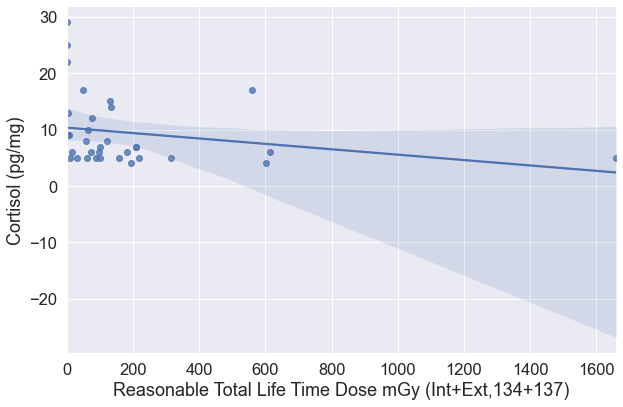

In [56]:
sns.set(font_scale=1.5)
sns.lmplot(x='Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', y='Cortisol (pg/mg)',
           height=6, aspect=1.5,
           data=total_dose_cortisol)

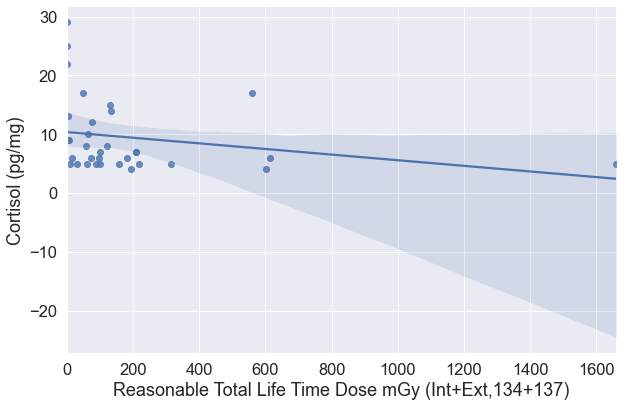

In [91]:
sns.set(font_scale=1.5)
sns.lmplot(x='Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', y='Cortisol (pg/mg)', 
#            hue='year',
           height=6, aspect=1.5,
           data=total_dose_cortisol)

<Figure size 720x432 with 0 Axes>

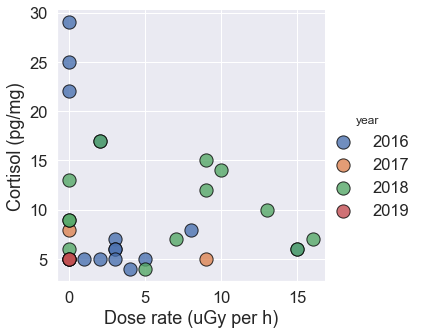

In [96]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,))
sns.lmplot(x='Dose rate (uGy per h)', y='Cortisol (pg/mg)', 
           hue='year',
            truncate=False,
            fit_reg=False,
                scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black', 's':175,},
#            height=6, aspect=1.5,
           data=total_dose_cortisol)

<Figure size 720x432 with 0 Axes>

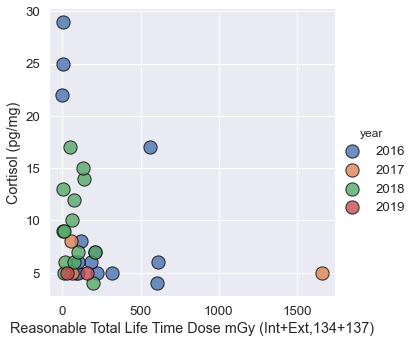

In [98]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.lmplot(x='Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', y='Cortisol (pg/mg)',
            truncate=False,
           hue='year',
           fit_reg=False,
#             order=3,
                scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black', 's':175,},
#             lowess=True,
#            height=6, aspect=1.5,
           data=total_dose_cortisol)

In [61]:
total_dose_cortisol = pd.read_excel('../excel data/cleaned/total_dose_cortisol-th-30Sept20 (1).xlsx')

In [62]:
cols = [
    'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
    'Dose rate at capture (uGy per h)',
    'Cortisol (pg/mg)',
    'Age (months)',
    'encoded sex; M=0  F=1',
    'Sample ID',
]

In [63]:
total_dose_cortisol = total_dose_cortisol[cols].copy()

In [64]:
total_dose_cortisol.dropna(subset=['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'], inplace=True)

In [65]:
for col in total_dose_cortisol.columns:
    if col not in ['Age (months)', 'Sample ID']:
        total_dose_cortisol[col] = total_dose_cortisol[col].astype('float')

In [66]:
f_tm.enforce_col_types(total_dose_cortisol)

In [67]:
total_dose_cortisol.rename({'Dose rate at capture (uGy per h)': 'Dose rate (uGy per h)'}, axis=1, inplace=True)

In [68]:
total_dose_cortisol['Sex'] = total_dose_cortisol['encoded sex; M=0  F=1'].apply(lambda row: 'Male' if row == 0 else 'Female')

In [69]:
total_dose_cortisol.head(3)

,"Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy per h),Cortisol (pg/mg),Age (months),encoded sex; M=0 F=1,Sample ID,Sex
0,613.840071,15.849122,6.736842,20,1.0,1607261,Female
1,209.621361,3.316593,7.087576,20,0.0,1607262,Male
2,219.297820,5.162829,5.360000,18,1.0,1607264,Female


In [58]:
total_dose_cortisol.to_csv('total_dose_cortisol for gam.csv')

In [15]:
table = total_dose_cortisol[[
    'Sample ID',	
    'Sex',
    'Age (months)',
    'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',	
    'Dose rate (uGy per h)',	
    'Cortisol (pg/mg)'
]].copy()

In [16]:
table.describe(include='all').to_csv('cortisol table.csv')

## Visualizing Cortisol vs. Dose

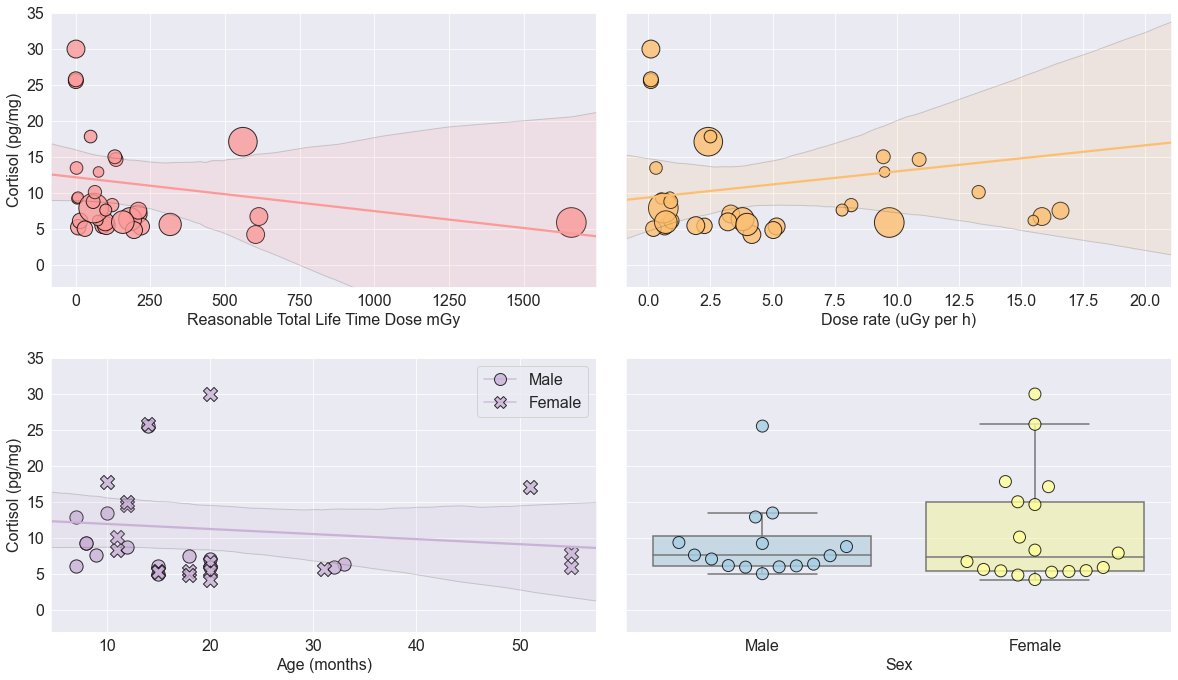

In [70]:
dose_type = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
             'Dose rate (uGy per h)',]

x2 = 'Age (months)'
x3 = 'Sex'
y = 'Cortisol (pg/mg)'

graph_y_vs_dose_age_sex2(df=total_dose_cortisol, 
                             x=dose_type[0], x2=x2, x3=x3, y=y,
                             x_name='Reasonable Total Life Time Dose mGy',
                             x_rate=dose_type[1],
                             x_rate_name='Dose rate (uGy per h)',
#                              multiplier=10
                            )

In [65]:
def extract_month(row):
    months = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
              5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
              10: 'October', 11: 'November', 12: 'December'}
    month = int(row[2:4])
    return months[month]

def extract_year(row):
    year = row[0:2]
    return '20'+year

total_dose_cortisol['Month captured'] = total_dose_cortisol['Sample ID'].apply(lambda row: extract_month(row))
total_dose_cortisol['Year captured'] = total_dose_cortisol['Sample ID'].apply(lambda row: extract_year(row))

In [66]:
from matplotlib.patches import Rectangle

blank = Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)

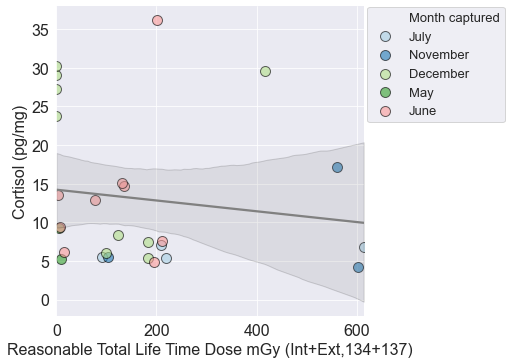

In [67]:
x = 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'
y = 'Cortisol (pg/mg)'
hue='Month captured'

df = total_dose_cortisol.copy()

fontsize=16

colors = sns.color_palette('Paired', len(df['Sample ID'].unique())), 
t = (0.7,)
test = [x + t for x in colors[0]]

# DOSE vs. cortisol
sns.lmplot(x=x, y=y, data=df, palette=test, hue=hue, height=5, 
           aspect=1, legend=False, fit_reg=False,
           scatter_kws={'alpha':.6, 'linewidth':1, 'edgecolor':'black', 's':100})

plt.xlabel(x, fontsize=fontsize)
plt.ylabel(y, fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

sns.regplot(x=x, y=y, data=df, ax=ax, color='gray',
           fit_reg=True, scatter_kws={'alpha':.6, 'linewidth':1, 'edgecolor':'black', 's':0})

# ax.set_ylim(-3, 35)
y_name = y.replace('/', '')

plt.legend([blank] + handles, ['Month captured'] + labels, loc='upper left', bbox_to_anchor=(.99, 1.02),
           fancybox=True, markerscale=1, fontsize=13)

# plt.savefig(f'graphs/main figures/{hue} Cortisol vs {x}.png', dpi=600, bbox_inches='tight')

In [70]:
df.shape

(27, 10)

In [68]:
# total_dose_cortisol['log mass log length'] = total_dose_cortisol['']

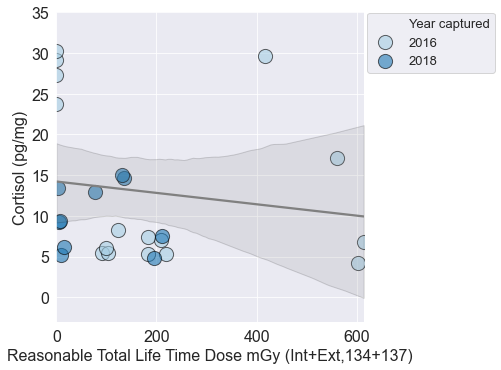

In [69]:
x = 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'
y = 'Cortisol (pg/mg)'
hue='Year captured'

df = total_dose_cortisol.copy()

fontsize=16

colors = sns.color_palette('Paired', len(df['Sample ID'].unique())), 
t = (0.7,)
test = [x + t for x in colors[0]]

# DOSE vs. cortisol
sns.lmplot(x=x, y=y, data=df, palette=test, hue=hue, height=5, 
           aspect=1, legend=False, fit_reg=False,
           scatter_kws={'alpha':.6, 'linewidth':1, 'edgecolor':'black', 's':200})

plt.xlabel(x, fontsize=fontsize)
plt.ylabel(y, fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

sns.regplot(x=x, y=y, data=df, ax=ax, color='gray',
           fit_reg=True, scatter_kws={'alpha':.6, 'linewidth':1, 'edgecolor':'black', 's':0})

ax.set_ylim(-3, 35)
y_name = y.replace('/', '')

plt.legend([blank] + handles, [hue] + labels, loc='upper left', bbox_to_anchor=(.99, 1.02),
           fancybox=True, markerscale=1, fontsize=13)

# plt.savefig(f'graphs/main figures/{hue} Cortisol vs {x}.png', dpi=600, bbox_inches='tight')

In [52]:
merge_tom_data_cortisol = pd.read_csv('../excel data/cleaned/merge_tom_data_cortisol.csv')
merge_tom_data_cortisol.head(3)

,Sample ID,Sex,Age (months),"INTERNAL Life time dose, mGy 134+137","EXTERNAL Dose Reasonable Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy per h),Cortisol (pg/mg),encoded sex,Month,Year,mass (kg),length (cm),girth (cm)
0,1607261,Female,20,29.200071,584.640,613.840071,15.849122,6.736842,1,July,2016,38.7,107.0,68.8
1,1607262,Male,20,4.997361,204.624,209.621361,3.316593,7.087576,0,July,2016,69.0,128.5,93.6
2,1607264,Female,18,31.137820,88.704,119.841820,5.162829,5.360000,1,July,2016,43.6,112.9,75.5


In [53]:
merge_tom_data_cortisol.shape

(24, 14)

In [54]:
merge_tom_data_cortisol['log mass log length'] = np.log(merge_tom_data_cortisol['mass (kg)']) / np.log(merge_tom_data_cortisol['length (cm)'])

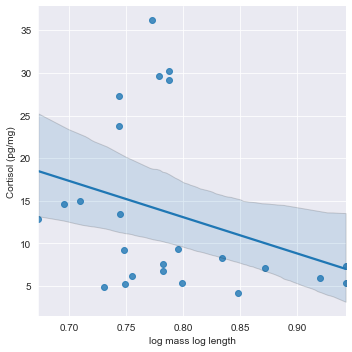

In [55]:
sns.lmplot(x='log mass log length', y='Cortisol (pg/mg)', data=merge_tom_data_cortisol)

In [56]:
'maybe very guarded'

'kind of fatter'

'producing cort expensive.. '

'0 dose.. '

'all bodily indicators suggest higher fitness.. '



'cortsiol & telomeres'

'cortsiol & telomeres'

In [ ]:
merge_tom_data_cortisol.corr()

In [ ]:
sns.lmplot(x='INTERNAL Life time dose, mGy 134+137', y='Cortisol (pg/mg)', data=merge_tom_data_cortisol)

In [ ]:
set(total_dose_cortisol['Sample ID']) - set(merge_tom_data_cortisol['Sample ID'])

In [ ]:
# total_dose_cortisol

In [ ]:
x = 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'
y = 'Cortisol (pg/mg)'
hue=None

df = merge_tom_data_cortisol.copy()

fontsize=16

colors = sns.color_palette('Paired', len(df['Sample ID'].unique())), 
t = (0.7,)
test = [x + t for x in colors[0]]

for x in ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'mass (kg)', 
          'girth (cm)', 'length (cm)']:
    # DOSE vs. cortisol
    sns.lmplot(x=x, y=y, data=df, palette=test, hue=hue, height=5, aspect=1, legend=False,
                scatter_kws={'alpha':.6, 'linewidth':1, 'edgecolor':'black', 's':300})

    plt.xlabel(x, fontsize=fontsize)
    plt.ylabel(y, fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()

#     plt.legend([blank] + handles, ['Month'] + labels, loc='upper left', bbox_to_anchor=(.99, 1.02),
#                fancybox=True, markerscale=1, fontsize=13)

    plt.tight_layout()
    
    X = df[x].values.reshape(-1, 1)
    y_t = df[y].values.reshape(-1, )
    fit_lm = LinearRegression().fit(X, y_t)
    print(f'OLS | {x} vs. {y} --> R2: {fit_lm.score(X, y_t):.4f}')
#     plt.savefig(f'graphs/main figures/Cortisol vs {x}.png', dpi=600, bbox_inches='tight')

In [ ]:
merge_tom_data_cortisol.corr()

## OLS linear regression

In [18]:
total_dose_cortisol.rename({'encoded sex; M=0  F=1':'encoded sex'}, axis=1, inplace=True)

In [21]:
# total_dose_cortisol

In [127]:
dose_type = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',]
y = total_dose_cortisol['Cortisol (pg/mg)'].values.reshape(-1, 1)
y_name = 'cortisol'

reg = f_tm.linear_regression_scores_X_y(total_dose_cortisol, y, y_name, dose_type)

OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. cortisol --> R2: 0.0225
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)'] vs. cortisol --> R2: 0.0225
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'encoded sex'] vs. cortisol --> R2: 0.0225



In [128]:
df = total_dose_cortisol.copy()
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose (mGy)'}, axis=1, inplace=True)

df['constant'] = 1
endog = df['Cortisol (pg/mg)']
exog = df[['Reasonable Total Life Time Dose (mGy)', 'Dose rate (uGy per h)', 'Age (months)', 'encoded sex', 'constant']]

model = sm.OLS(endog, exog=exog, missing='none', hasconst=True)
results = model.fit()

# results.summary()

## OLS multivariate linear regression results table

In [129]:
LRresult = (results.summary2().tables[1])
LRresult = LRresult.round(4).reset_index().rename({'index':'Independent variables',
                                                   't':'t statistic'}, axis=1)
# LRresult.iloc[0, 0] = 'Reasonable Life Time Dose'
# LRresult.iloc[2, 0] = 'Sex'
# LRresult.iloc[3, 0] = 'Constant'
LRresult

,Independent variables,Coef.,Std.Err.,t statistic,P>|t|,[0.025,0.975]
0,Reasonable Total Life Time Dose (mGy),-0.0107,0.0080,-1.3409,0.1904,-0.0271,0.0056
1,Dose rate (uGy per h),0.5575,0.3375,1.6518,0.1094,-0.1328,1.2478
2,Age (months),0.1158,0.1846,0.6274,0.5353,-0.2618,0.4934
3,encoded sex,0.1663,3.5271,0.0471,0.9627,-7.0475,7.3801
4,constant,8.0372,4.1906,1.9179,0.0650,-0.5336,16.6080


In [130]:
LRresult.to_csv('cortisol_linear_regression.csv')

In [ ]:
f_tm.render_mpl_table(LRresult.round(4), col_width=3.65, font_size=18,
                      path='graphs/main figures/OLS METRICS dose age sex vs cortisol.png')

In [ ]:
cols = pd.DataFrame({f'Dependent variable: {endog.name}':[''],
                     f'R2 score: {results.rsquared.round(4)}':['']})
f_tm.render_mpl_table(cols, col_width=7, font_size=18,
                      path=f'graphs/main figures/OLS cortisol LABEL.png')

In [ ]:
render_mpl_table(LRresult, font_size=18, figsize=(16, 4),
                 path='graphs/main figures/OLS cortisol.png')

## Linear generalized additive model

In [28]:
df = total_dose_cortisol.copy()
# df['constant'] = 1
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose mGy',
           'Mean Telomere Length (FISH)':
           'Mean Telomere Length (Telo-FISH)'}, axis=1, inplace=True)

df.to_csv('gam_cortisol.csv')

In [30]:
y = df['Cortisol (pg/mg)'].copy()
X = df[['Reasonable Total Life Time Dose mGy', 'Dose rate (uGy per h)', 'Age (months)', 'encoded sex',]].copy()

lam = np.logspace(3, 3, 3, 3)
lams = [lam] * 4
# n_splines=25
# lam=10

gam = LinearGAM(s(0) + s(1) + s(2) + s(3), fit_intercept=True).fit(X, y)
# gam = LinearGAM(s(0, lam=lam,) + s(1, lam=lam) + s(2,lam=lam) + s(3,lam=lam), fit_intercept=True).fit(X, y)

gam.gridsearch(X, y, lam=lams,
               keep_best=True, 
              )

100% (81 of 81) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [33]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      4.4913
Link Function:                     IdentityLink Log Likelihood:                                  -186.1089
Number of Samples:                           34 AIC:                                              383.2003
                                                AICc:                                             385.7919
                                                GCV:                                              123.6638
                                                Scale:                                             94.6577
                                                Pseudo R-Squared:                                   0.0812
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



In [ ]:
explainer = shap.KernelExplainer(gam.predict, X)
shap_values = explainer.shap_values(X)

In [ ]:
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values, features=X, feature_names=X.columns, show=False)
plt.savefig('SHAP cortisol summary.png', bbox_inches='tight', dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(0, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP cortisol total dose main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(1, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP cortisol dose rate main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(2, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP cortisol age main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(3, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP cortisol sex main.png', dpi=600, bbox_inches='tight')

In [ ]:
# gam.summary()

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=False, sharex=False)
fontsize=16

colors = sns.color_palette('Set1', len(df['Sample ID'].unique())), 
t = (1,)
test = [x + t for x in colors[0]]

titles = ['Reasonable Total Life Time Dose (mGy)', 'Age (months)', 'Sex']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color=test[i], linewidth=2)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='black', alpha=.8, ls='--')
    ax.set_xlabel(titles[i], fontsize=fontsize)
    ax.tick_params(labelsize=14)
axs[0].set_ylabel('Cortisol (pg/mg)', fontsize=fontsize)

plt.tight_layout()
# plt.savefig(f'graphs/main figures/GAM Cortisol vs {titles}.png', dpi=600, bbox_inches='tight')

In [ ]:
# explainer = shap.KernelExplainer(gam.predict, X)
explainer = shap.SamplingExplainer(gam.predict, X)
shap_values = explainer.shap_values(X)

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

In [ ]:
# shap.dependence_plot?

In [ ]:
shap.dependence_plot(0, shap_values, X, alpha=.3, dot_size=300,)

# Aryn Data (telomere length qPCR)

## Boar qPCR data

In [71]:
aryn_boar_df = pd.read_csv('../excel data/cleaned/aryn_boar_df.csv')
aryn_boar_df.drop(['Sex'], axis=1, inplace=True)

aryn_boar_dose = pd.read_csv('../excel data/cleaned/aryn_boar_dose.csv')

In [72]:
qPCR_cols_interest = general_cols_of_interest + ['Normalized T/A Average (Average Telomere Length)']

#aryn_boar_dose is loaded above in the cortisol section
aryn_qPCR_dose = f_tm.merge_return_df_cols_interest(aryn_boar_dose, aryn_boar_df, qPCR_cols_interest)
aryn_qPCR_dose.replace(to_replace=' ', value=np.NaN, inplace=True)
aryn_qPCR_dose.dropna(axis=0, inplace=True)
aryn_qPCR_dose.rename(columns={'Normalized T/A Average (Average Telomere Length)': 
                               'Mean Telomere Length (qPCR)',
                               'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)': 
                               'Dose rate (uGy per h)'}, inplace=True)

f_tm.enforce_col_types(aryn_qPCR_dose)

KeyError: "['teloFISH data'] not in index"

In [12]:
# saving for final writeup
aryn_qPCR_dose.to_csv('../excel data/cleaned/aryn_boar_qPCR_dose.csv', index=False)

In [13]:
aryn_qPCR_dose.corr()

,Age (months),"INTERNAL Life time dose, mGy 134+137","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy per h),Mean Telomere Length (qPCR)
Age (months),1.000000,0.644235,0.664395,0.022587,-0.178416
"INTERNAL Life time dose, mGy 134+137",0.644235,1.000000,0.717881,0.189575,-0.089305
"Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",0.664395,0.717881,1.000000,0.509702,-0.037146
Dose rate (uGy per h),0.022587,0.189575,0.509702,1.000000,0.062268
Mean Telomere Length (qPCR),-0.178416,-0.089305,-0.037146,0.062268,1.000000


In [73]:
aryn_qPCR_dose2 = pd.read_excel('../excel data/cleaned/aryn_boar_qPCR_dose_14Nov20.xlsx')
aryn_qPCR_dose2.to_csv('aryn_qPCR_dose2.csv')
aryn_qPCR_dose = pd.read_csv('aryn_qPCR_dose2.csv')

In [74]:
aryn_qPCR_dose.drop(['Unnamed: 0', "Kei's Age (weeks)"], axis=1, inplace=True)

In [75]:
aryn_qPCR_dose.to_csv('aryn_boar_qPCR for gam.csv')

In [76]:
# f_tm.enforce_col_types(aryn_qPCR_dose)

In [77]:
# incase module requires reloading
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
table2 = aryn_qPCR_dose[[
    'Sample ID',	
    'Sex',
    'Age (months)',
    'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',	
    'Dose rate (uGy per h)',	
    'Mean Telomere Length (qPCR)'
]].copy()

In [21]:
table2.describe(include='all').to_csv('qPCR table.csv')

### Visualizing Mean Telomere Length vs. Dose

In [47]:
def graph_y_vs_dose_age_sex2(df=None, x=None, x2=None, x3=None, y=None, hue=None, x_rate=None,
                            dose_x_size='Age (months)', x_name=None, x_rate_name=None, multiplier=16):
    f, axes = plt.subplots(2, 2, figsize=(17,10), sharey=True, sharex=False)
    
    fontsize=16
    
    colors = sns.color_palette('Paired', len(df['Sample ID'].unique())), 
    t = (0.7,)
    test = [x + t for x in colors[0]]
    
    # DOSE vs. Y
    sns.regplot(x=x, y=y, data=df, ax=axes[0, 0], color=test[4], truncate=False,
                scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black', 's':df[dose_x_size]*multiplier})
    
    # dose RATE vs. Y
    sns.regplot(x=x_rate, y=y, data=df, ax=axes[0, 1], color=test[6], truncate=False,
                scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black', 's':df[dose_x_size]*multiplier})
    
    # AGE vs. Y
    # male O markers
    sns.regplot(x=x2, y=y, data=df[df['Sex'] == 'Male'], ax=axes[1,0], color=test[8], marker='o', fit_reg=False, truncate=False,
                scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black', 's':175,})
    # female X markers
    sns.regplot(x=x2, y=y, data=df[df['Sex'] == 'Female'], ax=axes[1,0], color=test[8], marker='X', fit_reg=False, truncate=False,
                scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black', 's':200,})
    # plotting just the linear reg
    sns.regplot(x=x2, y=y, data=df, ax=axes[1,0], color=test[8], scatter_kws={'s':0,}, truncate=False)
    
    # creating custom legend
    handles, labels = [], []
    
    line1 = lines.Line2D([], [], color=test[8], alpha=.8, marker='o', mew=1, mec='black')
    line2 = lines.Line2D([], [], color=test[8], alpha=.8, marker='X', mew=1, mec='black')
    
    handles.append(line1)
    handles.append(line2)
    
    labels.append('Male')
    labels.append('Female')
    
    axes[1,0].legend(handles, labels, loc='upper right',ncol=1, fancybox=True, 
                   fontsize=fontsize, markerscale=2)
    
    # SEX vs. Y
    palette_cust = {'Male':test[0], 'Female':test[10]}
    sns.boxplot(x=x3, y=y, dodge=True, palette=palette_cust, order=['Male', 'Female'], data=df, ax=axes[1,1], showfliers=False)
    
    for patch in axes[1,1].artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .6))
        
    sns.swarmplot(x=x3, y=y, dodge=True, palette=palette_cust, order=['Male', 'Female'], data=df, ax=axes[1,1],
                  size=12, edgecolor='black', linewidth=1, **{'alpha':0.8})

    x_name = x_name
    x_rate_name = x_rate_name

    axes[0,0].set_xlabel(x_name, fontsize=fontsize)
    axes[0,0].set_ylabel(y, fontsize=fontsize)
    axes[0,0].tick_params(labelsize=fontsize)
    
    axes[0,1].set_xlabel(x_rate_name, fontsize=fontsize)
    axes[0,1].set_ylabel('', fontsize=fontsize)
    axes[0,1].tick_params(labelsize=fontsize)
    
    axes[1,0].set_xlabel(x2, fontsize=fontsize)
    axes[1,0].set_ylabel(y, fontsize=fontsize)
    axes[1,0].tick_params(labelsize=fontsize)
    
    axes[1,1].set_xlabel(x3, fontsize=fontsize)
    axes[1,1].set_ylabel('', fontsize=fontsize)
    axes[1,1].tick_params(labelsize=fontsize)

#     axes[0].set_xlim(-50,700)
#     axes[1].set_xlim(-4,55)
    if y == 'Mean Telomere Length (Telo-FISH)':
        axes[0,0].set_ylim(0.2,1.6)
        axes[1,0].set_ylim(0.2,1.6)
        y_name = y
    elif y == 'Mean Telomere Length (qPCR)':
        axes[0,0].set_ylim(0.6,1.8)
        axes[1,0].set_ylim(0.6,1.8)
        y_name = y
    elif y == 'Cortisol (pg/mg)':
        axes[0,0].set_ylim(-3, 35)
        y_name = y.replace('/', '')
    elif y == 'Average # of dicentrics per cell':
        axes[0,0].set_ylim(-0.005, .065)
        y_name = y
    
    plt.tight_layout(pad=3)
    plt.savefig(f'graphs/main figures/{y_name} vs {x} and {x2}.png', dpi=800, bbox_inches='tight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1349b3c40>]],
      dtype=object)

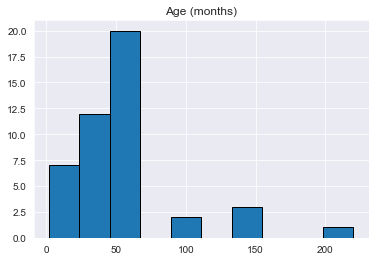

In [23]:
aryn_qPCR_dose.hist('Age (months)')

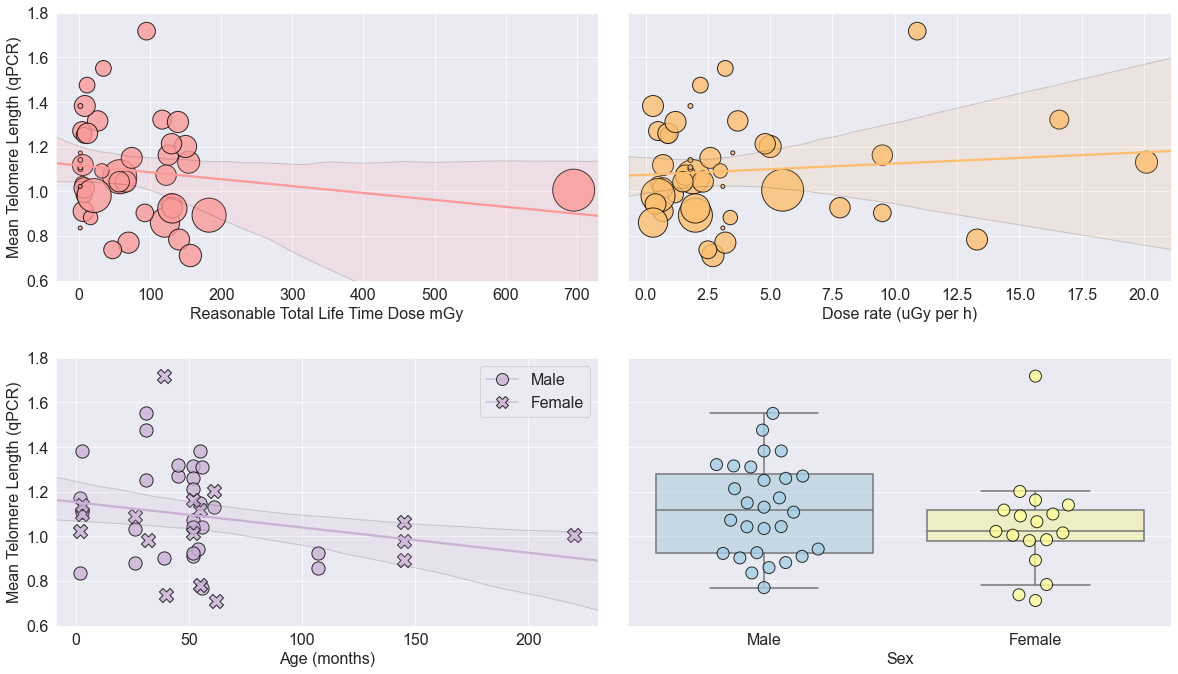

In [79]:
dose_type = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
             'Dose rate (uGy per h)',]

x3 = 'Sex'
x2 = 'Age (months)'
y = 'Mean Telomere Length (qPCR)'

graph_y_vs_dose_age_sex2(df=aryn_qPCR_dose, 
                             x=dose_type[0], x2=x2, x3=x3, y=y,
                             x_name='Reasonable Total Life Time Dose mGy',
                             x_rate=dose_type[1],
                             x_rate_name='Dose rate (uGy per h)',
                             multiplier=8
                            )

## OLS linear regression

In [81]:
aryn_qPCR_dose['encoded sex'] = aryn_qPCR_dose['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [82]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)']
y = aryn_qPCR_dose['Mean Telomere Length (qPCR)'].values.reshape(-1, 1)
y_name = 'Mean Telomere Length (qPCR)'

reg = f_tm.linear_regression_scores_X_y(aryn_qPCR_dose, y, y_name, x)

OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Mean Telomere Length (qPCR) --> R2: 0.0251
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)'] vs. Mean Telomere Length (qPCR) --> R2: 0.0509
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'encoded sex'] vs. Mean Telomere Length (qPCR) --> R2: 0.0673



In [83]:
df = aryn_qPCR_dose.copy()
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose (mGy)'}, axis=1, inplace=True)

df['constant'] = 1
endog = df['Mean Telomere Length (qPCR)']
exog = df[['Reasonable Total Life Time Dose (mGy)', 'Dose rate (uGy per h)', 'Age (months)', 'encoded sex', 'constant']]

model = sm.OLS(endog, exog=exog, missing='none', hasconst=True)
results = model.fit()

# results.summary()

In [84]:
test = pd.DataFrame({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':[1000], 
                     'Age (months)':[15], 
                     'encoded sex':[0],
                     'constant':1})


# results.predict(test)

## OLS multivariate linear regression results table

In [85]:
LRresult = (results.summary2().tables[1])
LRresult = LRresult.round(4).reset_index().rename({'index':'Independent variables',
                                                   't':'t statistic'}, axis=1)
# LRresult.iloc[0, 0] = 'Reasonable Life Time Dose'
# LRresult.iloc[2, 0] = 'Sex'
# LRresult.iloc[3, 0] = 'Constant'
LRresult

,Independent variables,Coef.,Std.Err.,t statistic,P>|t|,[0.025,0.975]
0,Reasonable Total Life Time Dose (mGy),-0.0001,0.0005,-0.3043,0.7625,-0.0011,0.0008
1,Dose rate (uGy per h),0.0064,0.0084,0.7622,0.4504,-0.0106,0.0234
2,Age (months),-0.0007,0.0012,-0.6003,0.5517,-0.0031,0.0017
3,encoded sex,-0.0603,0.0693,-0.8712,0.3888,-0.2003,0.0796
4,constant,1.1402,0.0652,17.4791,0.0000,1.0083,1.2720


In [86]:
LRresult.to_csv('aryn_qPCR_linear_reg.csv')

In [ ]:
f_tm.render_mpl_table(LRresult.round(4), col_width=3.65, font_size=18,
                      path='graphs/main figures/OLS METRICS dose age sex vs mean telos qPCR.png')

In [ ]:
cols = pd.DataFrame({f'Dependent variable: {endog.name}':[''],
                     f'R2 score: {results.rsquared.round(4)}':['']})
f_tm.render_mpl_table(cols, col_width=7, font_size=18,
                      path=f'graphs/main figures/OLS telo qPCR LABEL.png')

In [ ]:
render_mpl_table(LRresult, font_size=18, figsize=(16, 4),
                 path='graphs/main figures/OLS telo qPCR.png')

In [ ]:
df = aryn_qPCR_dose.copy()
df['constant'] = 1
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose mGy'}, axis=1, inplace=True)

y = df['Mean Telomere Length (qPCR)']
X = df[['Reasonable Total Life Time Dose mGy', 'Age (months)', 'encoded sex',]]

lam = np.logspace(-3, 3, 3)
lams = [lam] * 3
# n_splines=25
lam=100

gam = LinearGAM(s(0, 
                  lam=lam
                 ) + s(1, 
                       lam=lam
                      ) + l(2, 
                            lam=lam
                           ), fit_intercept=True).fit(X, y)
gam.gridsearch(X, y, lam=lams,
               keep_best=True, 
              )

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=False, sharex=False)
fontsize=16

colors = sns.color_palette('Set1', len(df['Sample ID'].unique())), 
t = (1,)
test = [x + t for x in colors[0]]

titles = ['Reasonable Total Life Time Dose (mGy)', 'Age (months)', 'Sex']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color=test[i], linewidth=2)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='black', alpha=.8, ls='--')
    ax.set_xlabel(titles[i], fontsize=fontsize)
    ax.tick_params(labelsize=14)
axs[0].set_ylabel('Mean Telomere Length (qPCR)', fontsize=fontsize)

plt.tight_layout()
# plt.savefig(f'graphs/main figures/GAM Mean Telomere Length (qPCR) vs {titles}.png', dpi=600, bbox_inches='tight')

In [ ]:
df = aryn_qPCR_dose.copy()
# df['constant'] = 1
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose mGy',
           'Mean Telomere Length (FISH)':
           'Mean Telomere Length (Telo-FISH)'}, axis=1, inplace=True)

df.to_csv('gam_telomere_qpcr.csv')

In [ ]:
y = df['Mean Telomere Length (qPCR)'].copy()
X = df[['Reasonable Total Life Time Dose mGy', 'Dose rate (uGy per h)', 'Age (months)', 'encoded sex',]].copy()

lam = np.logspace(5, 5, 5, 5)
lams = [lam] * 4
# n_splines=25
# lam=10

gam = LinearGAM(s(0) + s(1) + s(2) + s(3), fit_intercept=True).fit(X, y)
# gam = LinearGAM(s(0, lam=lam,) + s(1, lam=lam) + s(2,lam=lam) + s(3,lam=lam), fit_intercept=True).fit(X, y)

gam.gridsearch(X, y, lam=lams,
               keep_best=True, 
              )

In [ ]:
explainer = shap.KernelExplainer(gam.predict, X)
shap_values = explainer.shap_values(X)

In [ ]:
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values, features=X, feature_names=X.columns, show=False)
plt.savefig('SHAP telo qpcr summary.png', bbox_inches='tight', dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(0, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP telo qpcr dose main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(1, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP telo qpcr dose rate main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(2, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP telo qpcr age main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(3, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP telo qpcr sex main.png', dpi=600, bbox_inches='tight')

## Snake qPCR data

In [2]:
aryn_snake_df = pd.read_csv('../excel data/cleaned/aryn_snake_df.csv')
# aryn_snake_df.drop(10, axis=0, inplace=True)
# aryn_snake_df


aryn_snake_df['Sex'] = aryn_snake_df['Sex'].apply(lambda row: f_tm.male_or_female(row))
aryn_snake_df['encode sex'] = aryn_snake_df['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [3]:
aryn_snake_df.to_csv('snake ')

In [4]:
# saving for later writeup
aryn_snake_df.to_csv('../excel data/cleaned/aryn_snake_df.csv', index=False)

In [5]:
aryn_snake_df.shape

(20, 8)

In [4]:
aryn_snake_df.describe(include='all').to_csv('qPCR snake df.csv')

In [8]:
aryn_snake_df.corr()

,Mean Telomere Length (qPCR),Total length (cm),Mass (g),Total dose rates (μGy h-1) meth1,Total dose rates (μGy h-1) meth2,encode sex
Mean Telomere Length (qPCR),1.000000,0.142732,0.126011,-0.260031,-0.053938,0.271450
Total length (cm),0.142732,1.000000,0.932800,0.148179,0.047896,0.043859
Mass (g),0.126011,0.932800,1.000000,0.171983,0.067465,0.077861
Total dose rates (μGy h-1) meth1,-0.260031,0.148179,0.171983,1.000000,0.804350,-0.104262
Total dose rates (μGy h-1) meth2,-0.053938,0.047896,0.067465,0.804350,1.000000,-0.036582
encode sex,0.271450,0.043859,0.077861,-0.104262,-0.036582,1.000000


### Visualizing Mean Telomere Length vs. Dose rate

In [294]:
def snake_graph_y_vs_dose_age_sex(df=None, x=None, x2=None, x3=None, y=None, hue=None,):
    f, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=False)
    
    fontsize=16
    
    colors = sns.color_palette('Paired', len(df['Sample ID'].unique())), 
    t = (0.7,)
    test = [x + t for x in colors[0]]
    
    # DOSE vs. Y
    sns.regplot(x=x, y=y, data=df, ax=axes[0], color=test[6], truncate=False,
                scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black',
                             's':160,
#                              's':df['Mass (g)']*.7
                            })

    # SEX vs. Y
    palette_cust = {'Male':test[0], 'Female':test[10]}
    sns.boxplot(x=x3, y=y, dodge=True, palette=palette_cust, order=['Male', 'Female'], data=df, ax=axes[1],)
    
    for patch in axes[1].artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .6))
        
    sns.swarmplot(x=x3, y=y, dodge=True, palette=palette_cust, order=['Male', 'Female'], data=df, ax=axes[1],
                  size=12, edgecolor='black', linewidth=1, **{'alpha':0.8})

    x_name = 'Total dose rates (μGy h-1)'
    axes[0].set_xlabel(x_name, fontsize=fontsize)
    axes[0].set_ylabel(y, fontsize=fontsize)
    axes[0].tick_params(labelsize=fontsize)
    
    axes[1].set_xlabel(x3, fontsize=fontsize)
    axes[1].set_ylabel('', fontsize=fontsize)
    axes[1].tick_params(labelsize=fontsize)

#     axes[0].set_xlim(-50,700)
#     axes[1].set_xlim(-4,55)

#     axes[0].set_ylim(0.2,1.6)
#     axes[1].set_ylim(0.2,1.6)
    plt.tight_layout()
    plt.savefig(f'graphs/main figures/snake mean telos sex dose.png', dpi=600, bbox_inches='tight')

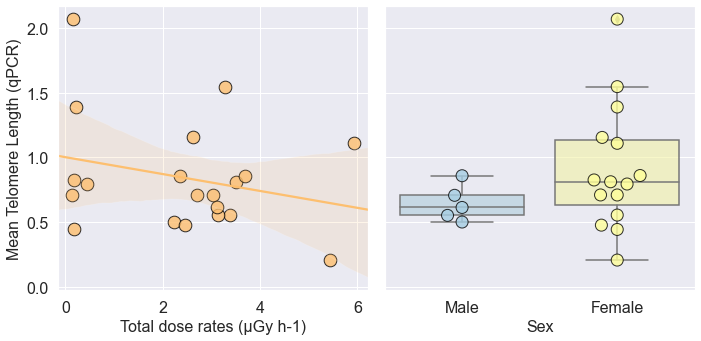

In [295]:
snake_graph_y_vs_dose_age_sex(df=aryn_snake_df, x='Total dose rates (μGy h-1) meth1', 
                              x3='Sex', y='Mean Telomere Length (qPCR)', )

In [293]:
df.head()

,0.0,0.1,0.2,0.3,0.5,1.0,2.0
5,3.902439,4.336735,5.474453,4.878049,5.357143,7.299270,4.591837
6,3.826531,4.336735,5.474453,4.878049,5.357143,6.829268,4.591837
7,3.826531,3.826531,5.109489,4.390244,5.102041,6.829268,4.591837
8,3.826531,3.826531,4.846939,3.902439,5.102041,6.829268,4.336735
9,3.649635,3.826531,4.846939,3.902439,5.102041,6.829268,4.336735


In [ ]:
df = aryn_snake_df.copy()
df['constant'] = 1
df.rename({'Total dose rates (μGy h-1) meth1':
           'Total dose rates (μGy h-1)'}, axis=1, inplace=True)

df.to_csv('gam_snake.csv')

y = df['Mean Telomere Length (qPCR)']
X = df[['Total dose rates (μGy h-1)', 'encode sex']]

lam = np.logspace(3, 3)
lams = [lam] * 2
# n_splines=25
# lam=100

gam = LinearGAM(s(0) + s(1), fit_intercept=True).fit(X, y)
gam.gridsearch(X, y, lam=lams,
               keep_best=True, 
              )

In [ ]:
explainer = shap.KernelExplainer(gam.predict, X)
shap_values = explainer.shap_values(X)

In [ ]:
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values, features=X, feature_names=X.columns, show=False)
plt.savefig('SHAP snake telo qpcr summary.png', bbox_inches='tight', dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(0, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP snake telo qpcr dose main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5), sharey=False, sharex=False)
fontsize=16

colors = sns.color_palette('Set1', len(df['Sample ID'].unique())), 
t = (1,)
test = [x + t for x in colors[0]]

titles = ['Total dose rates (μGy h-1)', 'Sex']
for i, ax in enumerate(axs):
    if i == 0:
        color = test[7]
    elif i ==1:
        color = test[3]
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color=color, linewidth=2)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='black', alpha=.8, ls='--')
    ax.set_xlabel(titles[i], fontsize=fontsize)
    ax.tick_params(labelsize=14)
axs[0].set_ylabel('Mean Telomere Length (qPCR)', fontsize=fontsize)

plt.tight_layout()
plt.savefig(f'graphs/main figures/GAM Mean Telomere Length (qPCR) vs {titles} SNAKES.png', dpi=600, bbox_inches='tight')

## Multivariate linear regression

In [9]:
aryn_snake_df.head(3)

,Sample ID,Sex,Mean Telomere Length (qPCR),Total length (cm),Mass (g),Total dose rates (μGy h-1) meth1,Total dose rates (μGy h-1) meth2,encode sex
0,CEC10,Female,0.444298,113.7,218.72,0.171601,0.304258,1
1,CEC18,Female,0.826190,108.3,206.50,0.168549,0.107030,1
2,CEC22,Female,2.067214,91.9,104.50,0.156359,0.032642,1


In [4]:
df = aryn_snake_df.copy()
df.rename({'Total dose rates (μGy h-1) meth1':
           'Total dose rates (μGy h-1)'}, axis=1, inplace=True)

df['constant'] = 1
endog = df['Mean Telomere Length (qPCR)']
exog = df[['Total dose rates (μGy h-1)', 'encode sex', 'constant']]

model = sm.OLS(endog, exog=exog, missing='none', hasconst=True)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Mean Telomere Length (qPCR)   R-squared:                       0.128
Model:                                     OLS   Adj. R-squared:                  0.025
Method:                          Least Squares   F-statistic:                     1.247
Date:                         Tue, 17 Nov 2020   Prob (F-statistic):              0.312
Time:                                 22:03:04   Log-Likelihood:                -9.7163
No. Observations:                           20   AIC:                             25.43
Df Residuals:                               17   BIC:                             28.42
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Total dose rates (μGy h-1)    -0.0587      0.057     -1.029      0.318      -0.179       0.062
encode sex                     0.2403      0.222      1.085      0.293      -0.227       0.708
constant                       0.8062      0.246      3.282      0.004       0.288       1.324
==============================================================================
Omnibus:                        4.500   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                2.650
Skew:                           0.861   Prob(JB):                        0.266
Kurtosis:                       3.464   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS multivariate linear regression results table

In [5]:
LRresult = (results.summary2().tables[1])
LRresult = LRresult.round(4).reset_index().rename({'index':'Independent variables',
                                                   't':'t statistic'}, axis=1)
LRresult.iloc[0, 0] = 'Total dose rates (μGy h-1)'
LRresult.iloc[1, 0] = 'encoded sex'
LRresult.iloc[2, 0] = 'constant'
LRresult

,Independent variables,Coef.,Std.Err.,t statistic,P>|t|,[0.025,0.975]
0,Total dose rates (μGy h-1),-0.0587,0.0571,-1.0288,0.3180,-0.1791,0.0617
1,encoded sex,0.2403,0.2215,1.0847,0.2932,-0.2271,0.7076
2,constant,0.8062,0.2456,3.2821,0.0044,0.2879,1.3244


In [6]:
LRresult.to_csv('snake_linear_reg.csv')

In [ ]:
f_tm.render_mpl_table(LRresult.round(4), col_width=3.65, font_size=18,
                      path='graphs/main figures/snake OLS METRICS dose sex vs mean telos qPCR.png')

In [ ]:
cols = pd.DataFrame({f'Dependent variable: {endog.name}':[''],
                     f'R2 score: {results.rsquared.round(4)}':['']})
f_tm.render_mpl_table(cols, col_width=7, font_size=18,
                      path=f'graphs/main figures/snake OLS dose sex vs {endog.name} COLUMNS.png')

In [ ]:
import six

In [ ]:
cols = pd.DataFrame({f'Dependent variable: {endog.name}':[''],
                     f'R2 score: {results.rsquared.round(4)}':['']})
f_tm.render_mpl_table(cols, col_width=7, font_size=18,
                      path=f'graphs/main figures/OLS SNAKE qPCR LABEL.png')

In [ ]:
render_mpl_table(LRresult, font_size=18, figsize=(16, 4),
                 path='graphs/main figures/OLS SNAKE telo qPCR.png')

### Statistics

In [ ]:
features_list = [['Total dose rates μGy h-1'], ['Total dose rates μGy h-1', 'encode sex']]

for features in features_list:
#     if 'encode sex' in features:
#         aryn_snake_df.dropna(axis=0, inplace=True)
    y = aryn_snake_df['Mean Telomere Length (qPCR)'].values.reshape(-1, 1)
    X = aryn_snake_df[features].values.reshape(-1, len(features))
    fit_lm = LinearRegression().fit(X, y)
    
    print(f'OLS | {features} vs. Mean Telomere Length (qPCR) --> R2: {fit_lm.score(X, y):.4f}')

# Dicentrics and Dose

In [81]:
kelly_boar_dicentrics_df = pd.read_csv('../excel data/cleaned/kelly_boar_dicentrics_df.csv')

dicentrics_cols = general_cols_of_interest + ['Average Dicentrics per cell']
merge_dicentrics_dose = f_tm.merge_return_df_cols_interest(kelly_boar_dose, kelly_boar_dicentrics_df, dicentrics_cols)

merge_dicentrics_dose.rename({'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)': 
                                      'Dose rate (uGy per h)'}, axis=1, inplace=True)

# saving for later writeup
merge_dicentrics_dose.to_csv('../excel data/cleaned/merge_dicentrics_dose.csv', index=False)

merge_dicentrics_dose.rename({'Average Dicentrics per cell': 'Average # of dicentrics per cell'}, axis=1, inplace=True)
merge_dicentrics_dose['encoded sex'] = merge_dicentrics_dose['Sex'].apply(lambda row: f_tm.encode_sex(row))

for row in [32, 33]:
    merge_dicentrics_dose.iloc[row, 3] = 0
    merge_dicentrics_dose.iloc[row, 4] = 0
    merge_dicentrics_dose.iloc[row, 5] = 0

KeyError: "['teloFISH data'] not in index"

In [30]:
# kelly_boar_dose

In [19]:
merge_dicentrics_dose.corr()

,Age (months),"INTERNAL Life time dose, mGy 134+137","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy per h),Average # of dicentrics per cell,encoded sex
Age (months),1.000000,0.770929,0.640492,0.005486,0.057957,0.302472
"INTERNAL Life time dose, mGy 134+137",0.770929,1.000000,0.722133,0.227064,-0.131685,0.433102
"Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",0.640492,0.722133,1.000000,0.573273,0.079379,0.453079
Dose rate (uGy per h),0.005486,0.227064,0.573273,1.000000,0.120908,0.286038
Average # of dicentrics per cell,0.057957,-0.131685,0.079379,0.120908,1.000000,-0.121289
encoded sex,0.302472,0.433102,0.453079,0.286038,-0.121289,1.000000


## Visualizing Dicentrics vs. Dose

In [ ]:
# dose_type = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
#              'Dose rate (uGy per h)',]

# x2 = 'Age (months)'
# x3 = 'Sex'
# y = 'Average # of dicentrics per cell'

# f_tm.graph_y_vs_dose_age_sex(df=merge_dicentrics_dose, 
#                              x=dose_type[0], x2=x2, x3=x3, y=y,
#                              x_name='Reasonable Total Life Time Dose mGy',
#                              x_rate=dose_type[1],
#                              x_rate_name='Dose rate (uGy per h)'
#                             )

In [82]:
age = pd.read_csv('../excel data/cleaned/merge_dicentrics_dose.csv')
age = age[['Age (months)', 'Sample ID']].copy()

In [83]:
merge_dicentrics_dose = pd.read_excel('../excel data/cleaned/merge_dicentrics_dose_06Nov20.xlsx')

In [84]:
merge_dicentrics_dose['Sample ID'] = merge_dicentrics_dose['Sample ID'].astype('str')
age['Sample ID'] = age['Sample ID'].astype('str')

In [85]:
merge_dicentrics_dose = merge_dicentrics_dose.merge(age, on='Sample ID', how='left')
merge_dicentrics_dose['encoded sex'] = merge_dicentrics_dose['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [86]:
merge_dicentrics_dose = merge_dicentrics_dose[
    ['Sample ID', 'Sex', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 
     'Dose rate at capture, Int + Ext (uGy per h)', 'Average Dicentrics per cell',
     'Age (months)', 'encoded sex']
].copy()

In [29]:
# for col in merge_dicentrics_dose:
#     if col not in ['Sample ID', 'Sex', 'Age (months)', 'encoded sex']:
#         merge_dicentrics_dose[col] = merge_dicentrics_dose[col].astype('float64')
        
# for col in ['Age (months)', 'encoded sex']:
#         merge_dicentrics_dose[col] = merge_dicentrics_dose[col].astype('int64')

In [30]:
merge_dicentrics_dose.columns

Index(['Sample ID', 'Sex',
       'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
       'Dose rate at capture, Int + Ext (uGy per h)',
       'Average Dicentrics per cell', 'Age (months)', 'encoded sex'],
      dtype='object')

In [87]:
merge_dicentrics_dose.rename({'Average Dicentrics per cell':'Average # of dicentrics per cell',
                             'Dose rate at capture, Int + Ext (uGy per h)':'Dose rate (uGy per h)'}, 
                             axis=1, inplace=True)

In [88]:
table3 = merge_dicentrics_dose[[
    'Sample ID',	
    'Sex',
    'Age (months)',
    'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',	
    'Dose rate (uGy per h)',	
    'Average # of dicentrics per cell'
]].copy()

In [89]:
table3.describe(include='all').to_csv('dicentrics table.csv')

In [32]:
merge_dicentrics_dose.to_csv('merge_dicentrics_dose for gam.csv')

In [208]:
merge_dicentrics_dose.iloc[30, -2] = 6
merge_dicentrics_dose.iloc[31, -2] = 6
merge_dicentrics_dose.iloc[32, -2] = 5

In [209]:
dicentrics_summ = merge_dicentrics_dose.drop('encoded sex', axis=1)

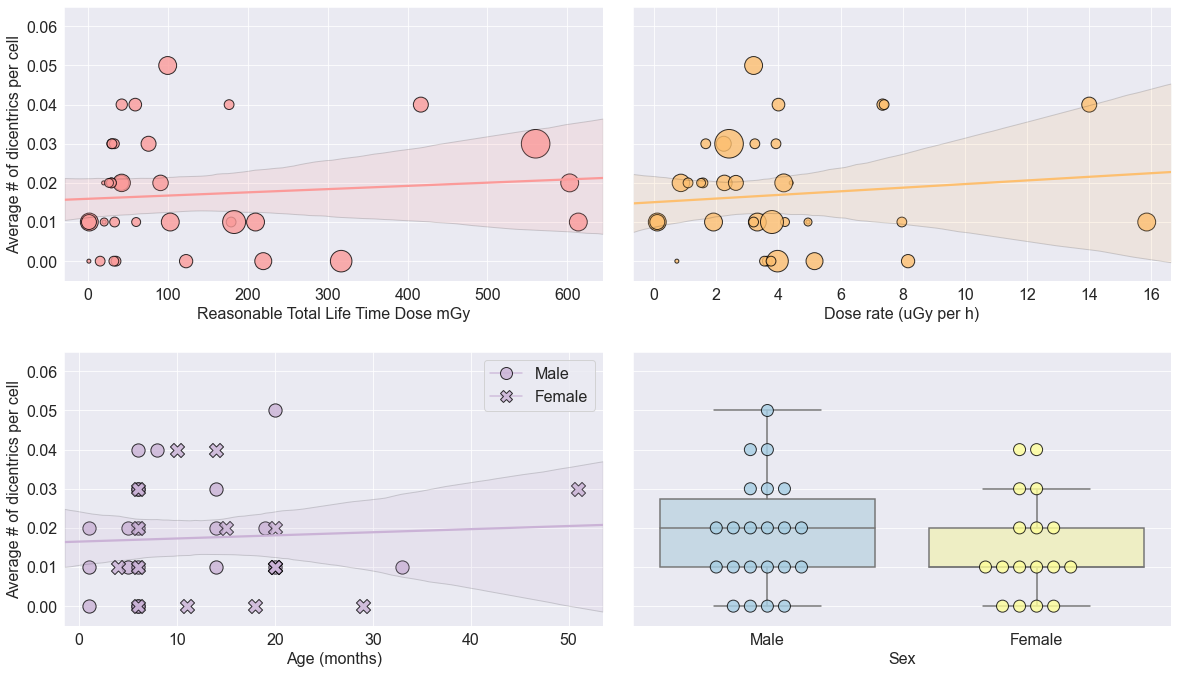

In [90]:
dose_type = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
             'Dose rate (uGy per h)',]

x2 = 'Age (months)'
x3 = 'Sex'
y = 'Average # of dicentrics per cell'

graph_y_vs_dose_age_sex2(df=merge_dicentrics_dose,                          
                             x=dose_type[0], x2=x2, x3=x3, y=y,
                             x_name='Reasonable Total Life Time Dose mGy',
                             x_rate=dose_type[1],
                             x_rate_name='Dose rate (uGy per h)'
                            )

In [191]:
merge_dicentrics_dose = merge_dicentrics_dose[
    ['Sample ID', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)',
     'Average # of dicentrics per cell', 'Age (months)', 'encoded sex']
].copy()

In [193]:
# merge_dicentrics_dose

## OLS linear regression

In [194]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)']
y = merge_dicentrics_dose['Average # of dicentrics per cell'].values.reshape(-1, 1)
y_name = 'Dicentrics'

reg = f_tm.linear_regression_scores_X_y(merge_dicentrics_dose, y, y_name, x)

OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Dicentrics --> R2: 0.0100
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)'] vs. Dicentrics --> R2: 0.0108
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'encoded sex'] vs. Dicentrics --> R2: 0.0390



In [195]:
df = merge_dicentrics_dose.copy()
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose (mGy)'}, axis=1, inplace=True)

df['constant'] = 1
endog = df['Average # of dicentrics per cell']
exog = df[['Reasonable Total Life Time Dose (mGy)', 'Dose rate (uGy per h)', 'Age (months)', 'encoded sex', 'constant']]

model = sm.OLS(endog, exog=exog, missing='none', hasconst=True)
results = model.fit()

# results.summary()

In [ ]:
# test = pd.DataFrame({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':[100_000], 
#                      'Age (months)':[8], 
#                      'encoded sex':[0],
#                      'constant':1})
# results.predict(test)

## OLS multivariate linear regression results table

In [196]:
LRresult = (results.summary2().tables[1])
LRresult = LRresult.round(6).reset_index().rename({'index':'Independent variables',
                                                   't':'t statistic'}, axis=1)
# LRresult.iloc[0, 0] = 'Reasonable Life Time Dose'
# LRresult.iloc[2, 0] = 'Sex'
# LRresult.iloc[3, 0] = 'Constant'
LRresult

,Independent variables,Coef.,Std.Err.,t statistic,P>|t|,[0.025,0.975]
0,Reasonable Total Life Time Dose (mGy),-0.000001,0.000027,-0.033913,0.973145,-0.000057,0.000055
1,Dose rate (uGy per h),0.000742,0.001050,0.706756,0.484534,-0.001391,0.002875
2,Age (months),0.000208,0.000369,0.563369,0.576881,-0.000541,0.000957
3,encoded sex,-0.005438,0.005058,-1.075047,0.289924,-0.015717,0.004842
4,constant,0.013938,0.005680,2.453849,0.019412,0.002395,0.025481


In [197]:
LRresult.to_csv('dicentrics_linear_reg.csv')

In [ ]:
# f_tm.render_mpl_table(LRresult.round(4), col_width=3.65, font_size=18,
#                       path='graphs/main figures/OLS METRICS dose age sex vs dicentrics.png')

In [ ]:
cols = pd.DataFrame({f'Dependent variable: {endog.name}':[''],
                     f'R2 score: {results.rsquared.round(4)}':['']})

display(cols)
f_tm.render_mpl_table(cols, col_width=7, font_size=18,
                      path=f'graphs/main figures/OLS dicentrics LABEL.png')

In [ ]:
render_mpl_table(LRresult, font_size=18, figsize=(16, 4),
                 path='graphs/main figures/OLS dicentrics.png')

## Linear generalized additive modeling

In [ ]:
df = merge_dicentrics_dose.copy()
df['constant'] = 1
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose mGy'}, axis=1, inplace=True)

y = df['Average # of dicentrics per cell']
X = df[['Reasonable Total Life Time Dose mGy', 
        'Age (months)', 
#         'encoded sex'
       ]]

# lam = np.logspace(-3, 3, 3)
# lams = [lam] * 3
# n_splines=25
# lam=100

lam = np.logspace(-2, 2, 2)
lams = [lam] * 2

gam = LinearGAM(s(0,) + s(1,) 
#                 l(2,)
                , 
                fit_intercept=True).fit(X, y)
gam.gridsearch(X, y, lam=lams,
               keep_best=True, 
              )

In [ ]:
# test = pd.DataFrame({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':[100_000], 
#                      'Age (months)':[8], 
#                      'encoded sex':[0],
#                      'constant':1})

# gam.predict(test.drop(['constant'], axis=1))

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5), sharey=False, sharex=False)
fontsize=16

colors = sns.color_palette('Set1', len(df['Sample ID'].unique())), 
t = (1,)
test = [x + t for x in colors[0]]

titles = ['Reasonable Total Life Time Dose (mGy)', 'Age (months)', 
#           'Sex'
         ]
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color=test[i], linewidth=2)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='black', alpha=.8, ls='--')
    ax.set_xlabel(titles[i], fontsize=fontsize)
    ax.tick_params(labelsize=14)
axs[0].set_ylabel('Average # of dicentrics', fontsize=fontsize)

plt.tight_layout()
# plt.savefig(f'graphs/main figures/GAM Dicentrics vs {titles}.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=False, sharex=False)
fontsize=16

colors = sns.color_palette('Set1', len(df['Sample ID'].unique())), 
t = (1,)
test = [x + t for x in colors[0]]

titles = ['Reasonable Total Life Time Dose (mGy)', 'Age (months)', 'Sex']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX), color=test[i], linewidth=2)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='black', alpha=.8, ls='--')
    ax.set_xlabel(titles[i], fontsize=fontsize)
    ax.tick_params(labelsize=14)
axs[0].set_ylabel('Average # of dicentrics', fontsize=fontsize)

plt.tight_layout()
# plt.savefig(f'graphs/main figures/GAM Dicentrics vs {titles}.png', dpi=600, bbox_inches='tight')

In [ ]:
gam.summary()

In [ ]:
df.to_csv('gam_dicentrics.xlsx')

In [ ]:
# df

In [ ]:
df = merge_dicentrics_dose.copy()
# df['constant'] = 1
df.rename({'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)':
           'Reasonable Total Life Time Dose mGy',
           'Mean Telomere Length (FISH)':
           'Mean Telomere Length (Telo-FISH)'}, axis=1, inplace=True)

df.to_csv('gam_dicentrics.csv')

y = df['Average # of dicentrics per cell'].copy()
X = df[['Reasonable Total Life Time Dose mGy', 'Dose rate (uGy per h)', 'Age (months)', 'encoded sex',]].copy()

lam = np.logspace(5, 5, 5, 5)
lams = [lam] * 4
# n_splines=25
# lam=10

gam = LinearGAM(s(0) + s(1) + s(2) + s(3), fit_intercept=True).fit(X, y)
# gam = LinearGAM(s(0, lam=lam,) + s(1, lam=lam) + s(2,lam=lam) + s(3,lam=lam), fit_intercept=True).fit(X, y)

gam.gridsearch(X, y, lam=lams,
               keep_best=True, 
              )

In [ ]:
explainer = shap.KernelExplainer(gam.predict, X)
shap_values = explainer.shap_values(X)

In [ ]:
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values, features=X, feature_names=X.columns, show=False)
plt.savefig('SHAP dicentrics summary.png', bbox_inches='tight', dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(0, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP dicentrics total dose main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(1, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP dicentrics dose rate main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(2, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP dicentrics age main.png', dpi=600, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
shap.dependence_plot(3, shap_values, X, ax=ax, dot_size=50, alpha=.65, show=False)
fig.savefig('SHAP dicentrics sex main.png', dpi=600, bbox_inches='tight')

# Misc data representations - GAMs

In [74]:
tables = [
    ['cortisol_s_table.csv', 'cortisol_p_table.csv'],
    ['dicentrics_s_table.csv', 'dicentrics_p_table.csv'],
    ['telofish_s_table.csv', 'telofish_p_table.csv'],
    ['mean_telomere_length_qpcr_s_table.csv', 'mean_telomere_length_qpcr_p_table.csv'],
    ['snake_s_table.csv', 'snake_p_table.csv'],
]

for table in tables:

    p_table = pd.read_csv(table[1])
    p_table.rename({'Unnamed: 0':''},axis=1,inplace=True)


    s_table = pd.read_csv(table[0])
    s_table.rename({'Unnamed: 0':''},axis=1,inplace=True)
    s_table.drop(['edf', 'Ref.df'], axis=1, inplace=True)
    
    spline = pd.DataFrame(['Spline terms:'])
    param = pd.DataFrame(['Parametric terms:'])
    s_table = pd.concat([spline, s_table, param], axis=0)
    merge = pd.concat([s_table, p_table])
    merge.rename({merge.columns[0]:''}, axis=1, inplace=True)
    merge.reset_index(inplace=True, drop=True)
    merge=merge.round(4)
    merge.fillna('', inplace=True)
    
    table_name = table[0].split('_')[0]
    
    merge.to_csv(f"{table_name} merge tables.csv")

#     render_mpl_table(merge, font_size=18, figsize=(16, 4),
#                  path=f"graphs/main figures/{table_name} merge.png")

In [116]:
telofish = pd.DataFrame({'Dependent variable: Mean Telomere Length (Telo-FISH)':[''],
                         f'R2 score: {-0.079}': ''})

dicentrics = pd.DataFrame({'Dependent variable: Average # of dicentrics per cell':[''],
                           f'R2 score: {0.0204}': ''})

cortisol = pd.DataFrame({'Dependent variable: Cortisol (pg/ml)':[''],
                         f'R2 score: {0.585}': ''})

telo_qpcr = pd.DataFrame({'Dependent variable: Mean Telomere Length (qPCR)':[''],
                          f'R2 score: {0.0122}': ''})

snake_qpcr = pd.DataFrame({'Dependent variable: Mean Telomere Length (qPCR)':[''],
                          f'R2 score: {0.0254}': ''})

In [117]:
f_tm.render_mpl_table(cortisol, col_width=7, font_size=18,
                      path=f"graphs/main figures/cortisol gam LABEL.png")

f_tm.render_mpl_table(dicentrics, col_width=7, font_size=18,
                      path=f"graphs/main figures/dicentrics gam LABEL.png")

f_tm.render_mpl_table(telofish, col_width=7, font_size=18,
                      path=f"graphs/main figures/teloFISH gam LABEL.png")

f_tm.render_mpl_table(telo_qpcr, col_width=7, font_size=18,
                      path=f"graphs/main figures/telomere length qPCR gam LABEL.png")

f_tm.render_mpl_table(snake_qpcr, col_width=7, font_size=18,
                      path=f"graphs/main figures/SNAKE telomere length qPCR gam LABEL.png")

In [90]:
cols = pd.DataFrame({f'Dependent variable: {endog.name}':[''],
                     f'R2 score: {results.rsquared.round(4)}':['']})
f_tm.render_mpl_table(cols, col_width=7, font_size=18,
                      path=f'graphs/main figures/OLS cortisol LABEL.png')

NameError: name 'endog' is not defined

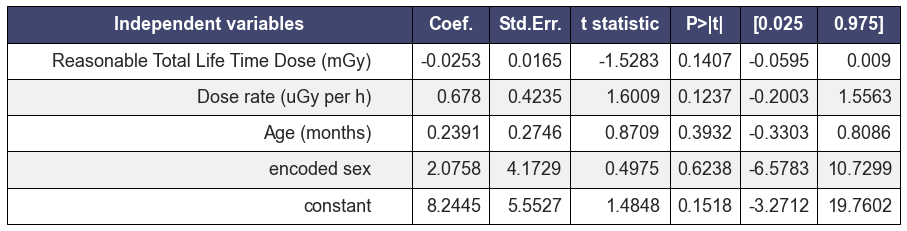

In [149]:
render_mpl_table(LRresult, font_size=18, figsize=(16, 4),
                 path='graphs/main figures/OLS cortisol.png')

# Dose Response

In [6]:
import random
from scipy.stats import zscore

In [14]:
def randomiseMissingData(df2):
    "randomise missing data for DataFrame (within a column)"
    df = df2.copy()
    for col in df.columns:
        data = df[col]
        mask = data.isnull()
        samples = random.choices( data[~mask].values , k = mask.sum() )
        data[mask] = samples

    return df

In [15]:
dose_test = pd.read_excel('../excel data/cleaned/Dose Response Telomeres test.xlsx')

In [16]:
df = dose_test.replace('Mean', np.nan)
df.dropna(how='all', inplace=True)
df = randomiseMissingData(df)

In [17]:
swine2 = pd.read_excel('../excel data/cleaned/Dose Response Telomeres test.xlsx', sheet_name='swine2')
swine3 = pd.read_excel('../excel data/cleaned/Dose Response Telomeres test.xlsx', sheet_name='swine3')
swine4 = pd.read_excel('../excel data/cleaned/Dose Response Telomeres test.xlsx', sheet_name='swine4')

swine2 = swine2.replace('Mean', np.nan)
swine3 = swine3.replace('Mean', np.nan)
swine4 = swine4.replace('Mean', np.nan)

all_data = pd.concat([
    swine2, 
    swine3, 
    swine4
], axis=0)

In [18]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df))

In [19]:
# all_data.drop(0.5, axis =1, inplace=True)

In [20]:
df = all_data.copy()

# df = df.replace('Mean', np.nan)
df.dropna(how='all', inplace=True)
df = randomiseMissingData(df)

df = df.apply(lambda x: x.sort_values(ascending=False).values)

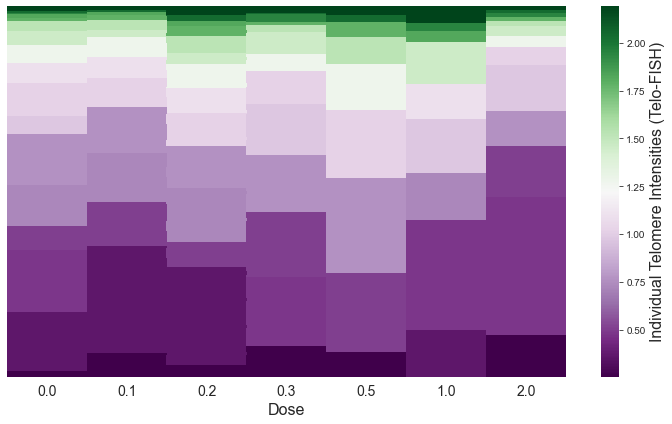

In [57]:
plt.figure(figsize=(10, 6))

# sns.heatmap(df, 
#             robust=True, 
#             cmap="PRGn",
#             yticklabels=False,
#            )

# plt.figure(figsize=(12,6))

ax = sns.heatmap(df, 
            robust=True, 
            cmap="PRGn",
            yticklabels=False,
            cbar_kws={'label': 'Individual Telomere Intensities (Telo-FISH)'}
           )

ax.figure.axes[-1].yaxis.label.set_size(16)

plt.xticks(fontsize=14)
plt.xlabel('Dose', fontsize=16)

plt.tight_layout()
plt.savefig(f'graphs/main figures/telomere range vs dose curve.png', dpi=600, bbox_inches='tight')

In [17]:
df3 = df.melt(var_name='gray', value_name='telo')

In [28]:
# sns.lmplot(x='gray', y='telo', order=2, n_boot=100, ci=95, data=df)

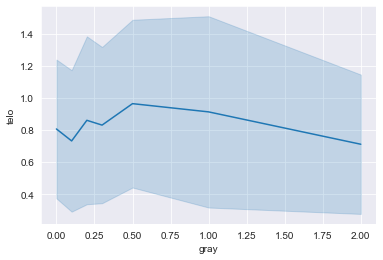

In [31]:
sns.lineplot(x='gray', y='telo', ci='sd', data=df3)

In [24]:
df3.head(3)

,gray,telo
0,0.0,3.902439
1,0.0,3.826531
2,0.0,3.826531


In [20]:
df = df.apply(lambda x: x.sort_values(ascending=False).values)

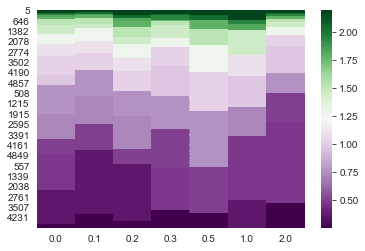

In [21]:
sns.heatmap(df, 
            robust=True, 
            cmap="PRGn",
           )

In [65]:
dicentrics = pd.read_excel('../excel data/cleaned/Dose Response Dicentrics Analysis.xlsx')

In [66]:
dicentrics['Dose'] = dicentrics['Dose'].apply(lambda row: row.replace('Gy', '').strip())

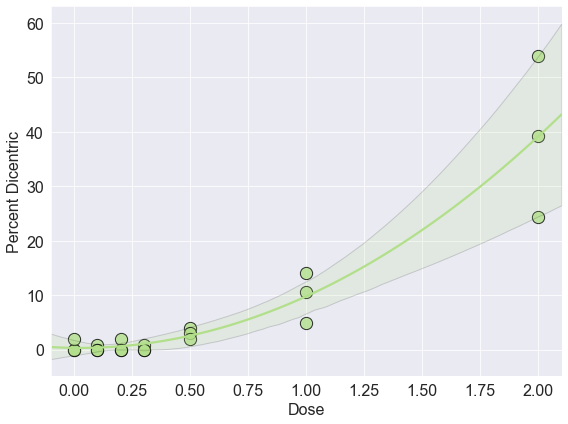

In [67]:
dicentrics['Dose'] = dicentrics['Dose'].astype('float')
dicentrics['Percent Dicentric'] = dicentrics['Percent Dicentric'].astype('float')

plt.figure(figsize=(8,6))
fontsize=16

colors = sns.color_palette('Paired', 15), 
t = (0.7,)
test = [x + t for x in colors[0]]

# DOSE vs. Y
ax = sns.regplot(x='Dose', y='Percent Dicentric', data=dicentrics, color=test[2], order=2, truncate=False,
            scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black','s':150})

ax.set_xlabel('Dose', fontsize=fontsize)
ax.set_ylabel('Percent Dicentric', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

plt.tight_layout()
plt.savefig(f'graphs/main figures/dicentrics dose response.png', dpi=600, bbox_inches='tight')

In [33]:
telos = pd.read_excel('../excel data/cleaned/dose response telos.xlsx')

In [34]:
telos

,Dose,Average Intensity,SD
0,0.1,0.955402,0.917660
1,0.2,1.104476,1.065033
2,0.3,0.949733,0.832080
3,0.5,1.507095,1.497650
4,1.0,1.191422,1.154925
5,2.0,0.872038,0.909402


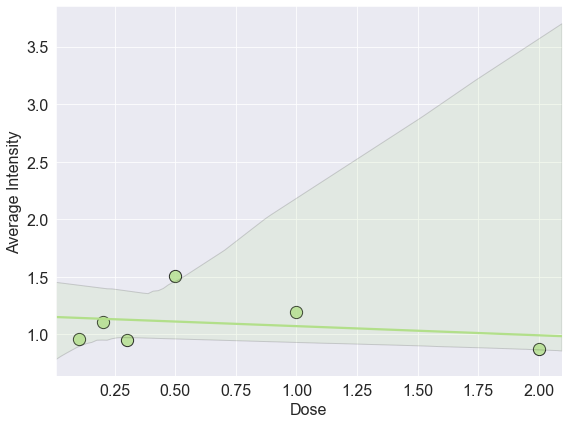

In [36]:
plt.figure(figsize=(8,6))
fontsize=16

colors = sns.color_palette('Paired', 15), 
t = (0.7,)
test = [x + t for x in colors[0]]

# DOSE vs. Y
ax = sns.regplot(x='Dose', y='Average Intensity', data=telos, color=test[2], truncate=False,
            scatter_kws={'alpha':.8, 'linewidth':1, 'edgecolor':'black','s':150})

ax.set_xlabel('Dose', fontsize=fontsize)
ax.set_ylabel('Average Intensity', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

plt.tight_layout()
# plt.savefig(f'graphs/main figures/dicentrics dose response.png', dpi=600, bbox_inches='tight')

In [37]:
sns

<module 'seaborn' from '/usr/local/lib/python3.8/site-packages/seaborn/__init__.py'>

In [45]:
red = merge_kelly_teloFISH_dose[
    ['Sample ID', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'teloFISH data']].copy()

In [46]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

# red['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] = red['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'].apply(lambda x: custom_round(x, base=5))
red['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] = round(red['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'], 2)

# df = pd.Series([11,16,21]).apply(lambda x: custom_round(x, base=5))

In [47]:
red.head(3)

,Sample ID,"Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",teloFISH data
0,1606103,34.91,"[0.4915182841543535, 0.48034741405993636, 0.21..."
1,1607205,0.92,"[0.2960280575020538, 0.6758376407122361, 0.508..."
2,1607221,20.10,"[0.9160113477422043, 0.754033731373156, 0.2569..."


In [48]:
explode_telos_raw = red['teloFISH data'].apply(pd.Series)
explode_telos_raw = pd.concat([explode_telos_raw, red['Sample ID']], axis=1)

print(explode_telos_raw.shape)
explode_telos_raw.head(4)

(37, 4801)


,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,Sample ID
0,0.491518,0.480347,0.212247,0.195490,0.513860,0.547373,0.184319,0.335126,0.189905,0.904840,...,0.681423,1.441042,0.234588,0.446835,0.167563,0.173148,0.268101,1.100331,0.178734,1606103
1,0.296028,0.675838,0.508275,0.323955,0.480347,0.368639,0.687009,0.675838,0.491518,0.307199,...,0.603227,0.374224,0.312784,0.234588,0.647910,0.742863,0.374224,0.240174,0.530616,1607205
2,0.916011,0.754034,0.256930,0.569714,0.167563,0.860157,0.754034,0.430078,0.351882,0.787546,...,0.418908,0.653496,0.491518,0.424493,0.714936,0.480347,0.547373,0.229003,0.647910,1607221
3,0.564129,0.240174,1.016549,0.418908,0.921597,0.916011,0.323955,0.631154,0.346297,0.262515,...,0.675838,0.201076,0.508275,0.418908,0.480347,0.759619,0.703765,0.217832,0.714936,1607231


In [49]:
exploded_telos = (explode_telos_raw
                                  
    # we'll merge the exploded telos df w/ our original all patients df on the index!
    .merge(red.drop('teloFISH data', axis=1), on='Sample ID')
    .melt(id_vars = ['Sample ID', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'], 
          value_name = "individual telomeres") 
    .drop("variable", axis = 1)
    .dropna()
)

exploded_telos

,Sample ID,"Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",individual telomeres
0,1606103,34.91,0.491518
1,1607205,0.92,0.296028
2,1607221,20.10,0.916011
3,1607231,28.03,0.564129
4,1607262,209.62,1.731485
...,...,...,...
177595,161126F109,29.53,0.550953
177596,1611262F110,268.20,1.339572
177597,1611281O206,29.14,1.231542
177598,1611304O213,32.90,1.782495


In [50]:
test = exploded_telos.pivot(columns='Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
                                    values='individual telomeres',).reset_index(drop=True)

In [51]:
test.dropna(how='all', inplace=True)
test = randomiseMissingData(test)

test = test.apply(lambda x: x.sort_values(ascending=False).values)

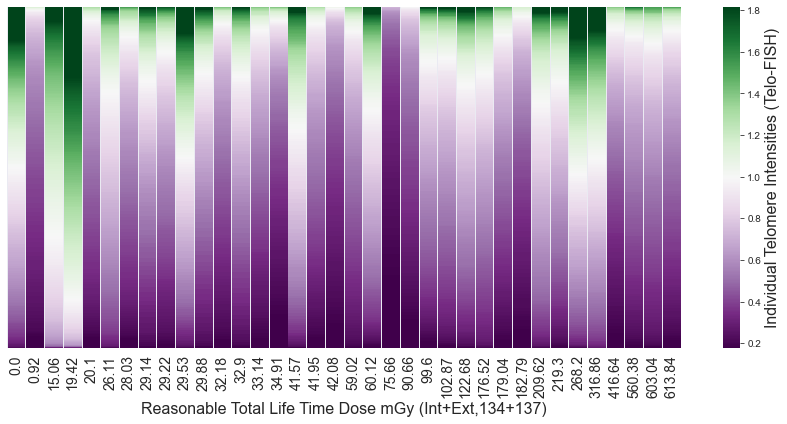

In [58]:
# sns.set(font_scale=1.25)

plt.figure(figsize=(12,6))

ax = sns.heatmap(test, 
            robust=True, 
            cmap="PRGn",
            yticklabels=False,
            cbar_kws={'label': 'Individual Telomere Intensities (Telo-FISH)'}
           )

ax.figure.axes[-1].yaxis.label.set_size(16)

plt.xticks(fontsize=14)
plt.xlabel('Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', fontsize=16)

plt.tight_layout()
plt.savefig(f'graphs/main figures/telomere range vs lifetime dose.png', dpi=600, bbox_inches='tight')

In [60]:
merge_kelly_teloFISH_dose.head(3)

,Sample ID,Sex,Age (months),"INTERNAL Life time dose, mGy 134+137","Reasonable Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137),teloFISH data,teloFISH means
0,1606103,Male,6,2.756694,34.911894,3.554446,"[0.4915182841543535, 0.48034741405993636, 0.21...",0.439557
1,1607205,Male,1,0.034633,0.916633,0.727816,"[0.2960280575020538, 0.6758376407122361, 0.508...",0.452469
2,1607221,Male,1,2.459387,20.099387,4.946150,"[0.9160113477422043, 0.754033731373156, 0.2569...",0.533217


In [61]:
red = merge_kelly_teloFISH_dose[
    ['Sample ID', 'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)', 'teloFISH data']].copy()

In [62]:
def custom_round(x, base=1):
    return int(base * round(float(x)/base))

red['Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)'] = round(red['Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)'], 2)

# df = pd.Series([11,16,21]).apply(lambda x: custom_round(x, base=5))

In [63]:
# red

In [64]:
explode_telos_raw = red['teloFISH data'].apply(pd.Series)
explode_telos_raw = pd.concat([explode_telos_raw, red['Sample ID']], axis=1)

print(explode_telos_raw.shape)
explode_telos_raw.head(4)

(37, 4801)


,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,Sample ID
0,0.491518,0.480347,0.212247,0.195490,0.513860,0.547373,0.184319,0.335126,0.189905,0.904840,...,0.681423,1.441042,0.234588,0.446835,0.167563,0.173148,0.268101,1.100331,0.178734,1606103
1,0.296028,0.675838,0.508275,0.323955,0.480347,0.368639,0.687009,0.675838,0.491518,0.307199,...,0.603227,0.374224,0.312784,0.234588,0.647910,0.742863,0.374224,0.240174,0.530616,1607205
2,0.916011,0.754034,0.256930,0.569714,0.167563,0.860157,0.754034,0.430078,0.351882,0.787546,...,0.418908,0.653496,0.491518,0.424493,0.714936,0.480347,0.547373,0.229003,0.647910,1607221
3,0.564129,0.240174,1.016549,0.418908,0.921597,0.916011,0.323955,0.631154,0.346297,0.262515,...,0.675838,0.201076,0.508275,0.418908,0.480347,0.759619,0.703765,0.217832,0.714936,1607231


In [65]:
exploded_telos = (explode_telos_raw
                                  
    # we'll merge the exploded telos df w/ our original all patients df on the index!
    .merge(red.drop('teloFISH data', axis=1), on='Sample ID')
    .melt(id_vars = ['Sample ID', 'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)'], 
          value_name = "individual telomeres") 
    .drop("variable", axis = 1)
    .dropna()
)

exploded_telos

,Sample ID,Dose rate (uGy/h) at time of capture (Int+Ext; 134+137),individual telomeres
0,1606103,3.55,0.491518
1,1607205,0.73,0.296028
2,1607221,4.95,0.916011
3,1607231,2.13,0.564129
4,1607262,3.32,1.731485
...,...,...,...
177595,161126F109,1.66,0.550953
177596,1611262F110,15.39,1.339572
177597,1611281O206,1.57,1.231542
177598,1611304O213,3.92,1.782495


In [66]:
test = exploded_telos.pivot(columns='Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)',
                                    values='individual telomeres',).reset_index(drop=True)

In [84]:
len(exploded_telos['Sample ID'].unique())

37

In [67]:
test.dropna(how='all', inplace=True)
test = randomiseMissingData(test)

test = test.apply(lambda x: x.sort_values(ascending=False).values)

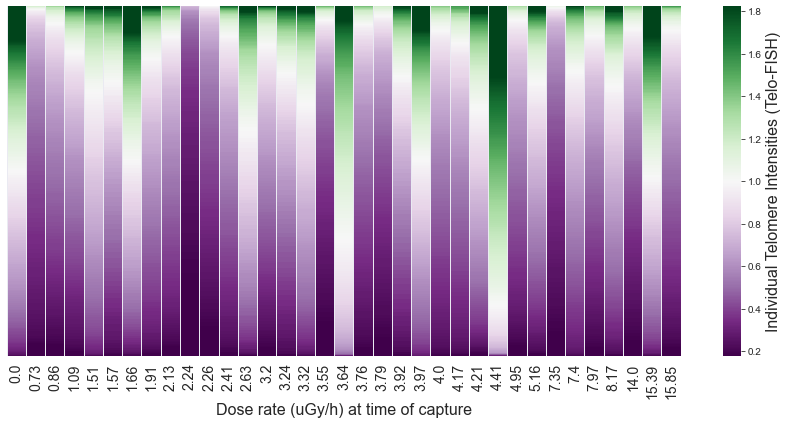

In [69]:
plt.figure(figsize=(12,6))

ax = sns.heatmap(test, 
            robust=True, 
            cmap="PRGn",
            yticklabels=False,
            cbar_kws={'label': 'Individual Telomere Intensities (Telo-FISH)'}
           )


ax.figure.axes[-1].yaxis.label.set_size(16)

plt.xticks(fontsize=14)
plt.xlabel('Dose rate (uGy/h) at time of capture', fontsize=16)

plt.tight_layout()
plt.savefig(f'graphs/main figures/telomere range vs dose rate.png', dpi=600, bbox_inches='tight')